<a href="https://colab.research.google.com/github/manzoniandrea/Large_Basin_Scale_Recarge_Rate/blob/main/hydologic_soil_group/Ksat_Brakeinsiel_Rosetta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A general method for estimating saturated hydraulic conductivity from information on soil type and soil bulk density.

A very general method (Rawls and Brakensiek, 1983) has been implemented to estimate the saturated hydraulic conductivity (Ksat) group of soil. The method has been developed from a statistical analysis of several thousand measurement in a variety of soils. Because of the design for wide application the method must be adjusted based on experience and local conditions.

The input required for the method are the Clay and sand content of the soil (expressed as a fraction, considering that the soil can be composed of Clay, Sand and Silt) and information on soil bulk density (expressed in g/cm3).

the inputs are firstly used to assess to which bulk density class the soil belongs. To do this, a first set of three tables is used. Using the Clay and sand content of the soil it is possible to locate a point in all the tables and looking at the soil bulk density isolines it is possible to evaluate which table the pixel belongs to (and with it the bulk density class).


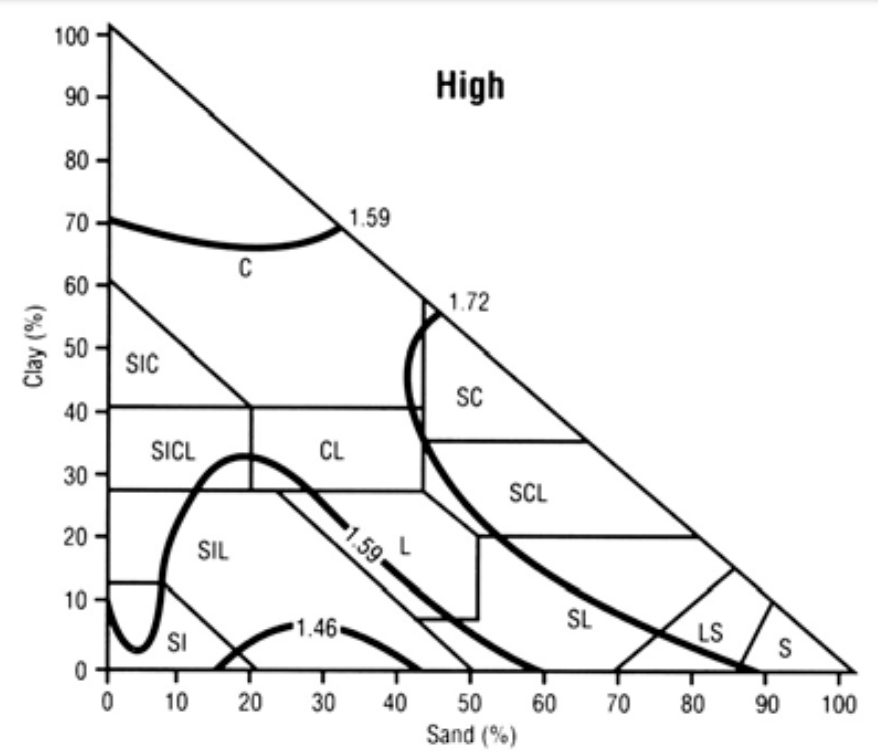

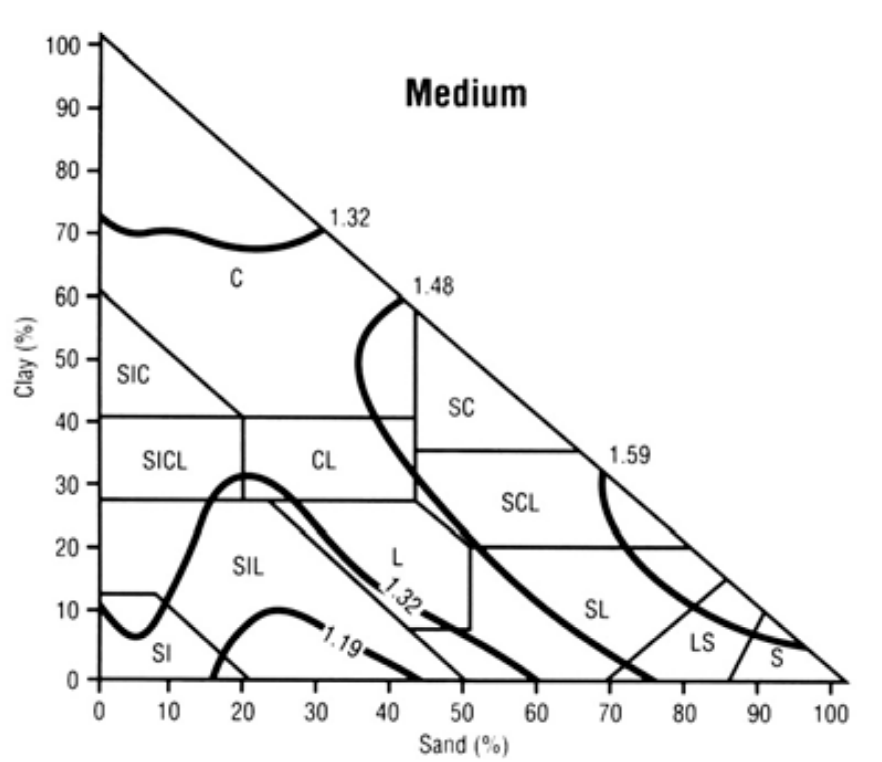


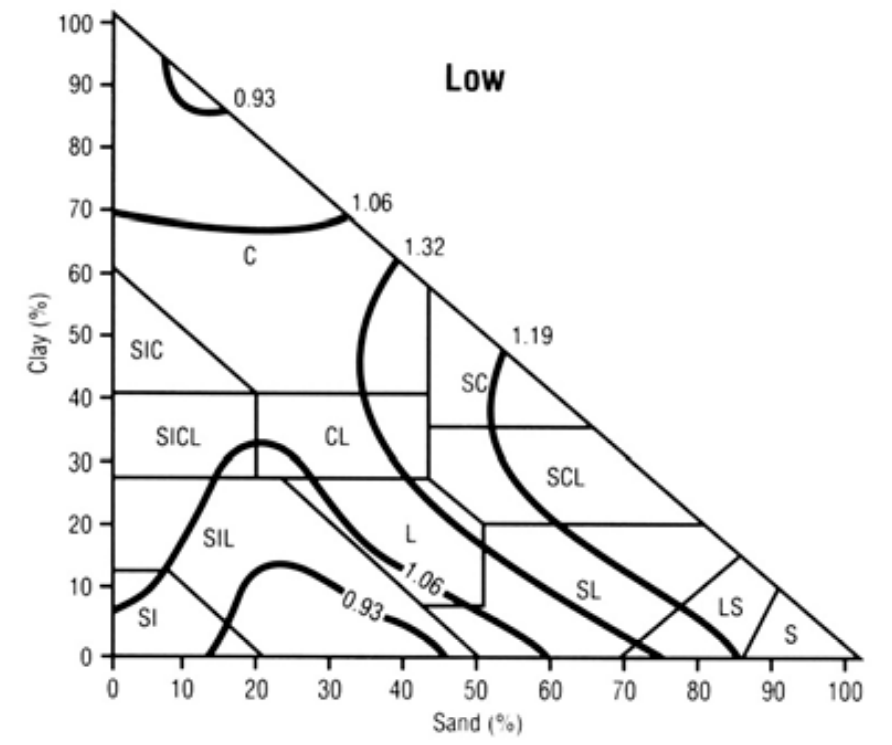

Ones the bulk density class has been selected, the correct one can be selected from the second set of three tables. Form the selected table is possible to estimate the Ksat group that are divided in high, moderately high, moderately low, and low.

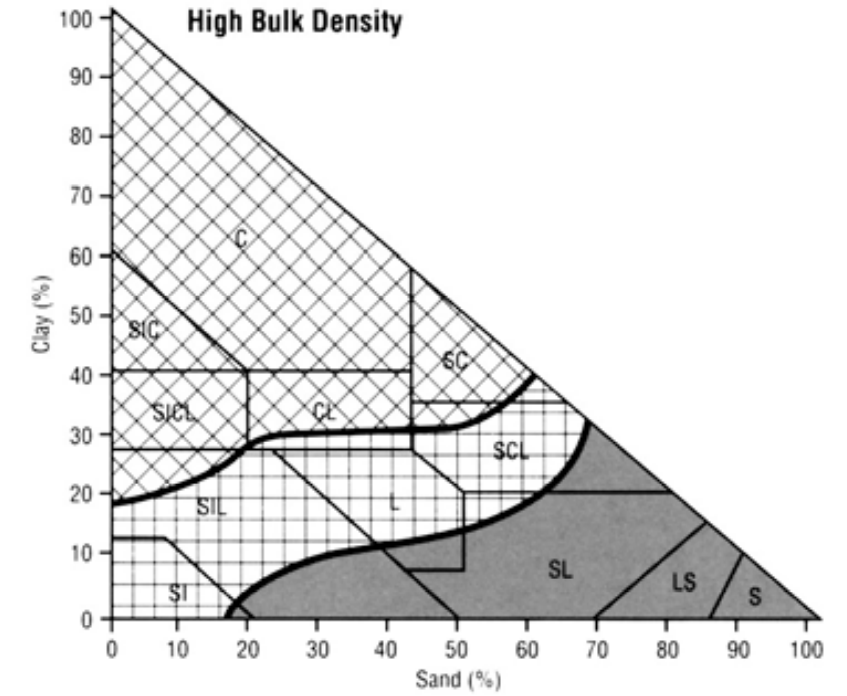

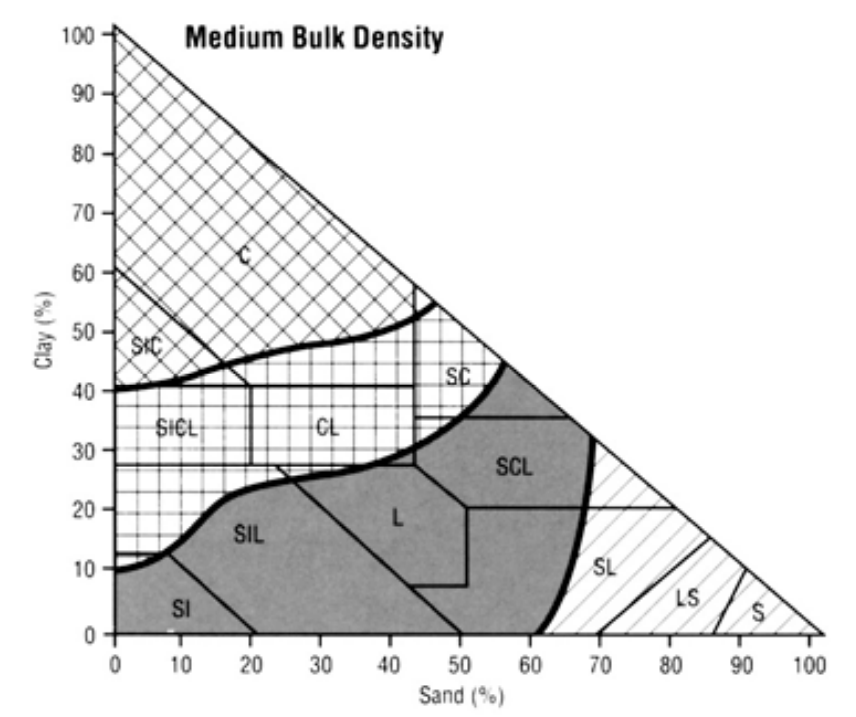

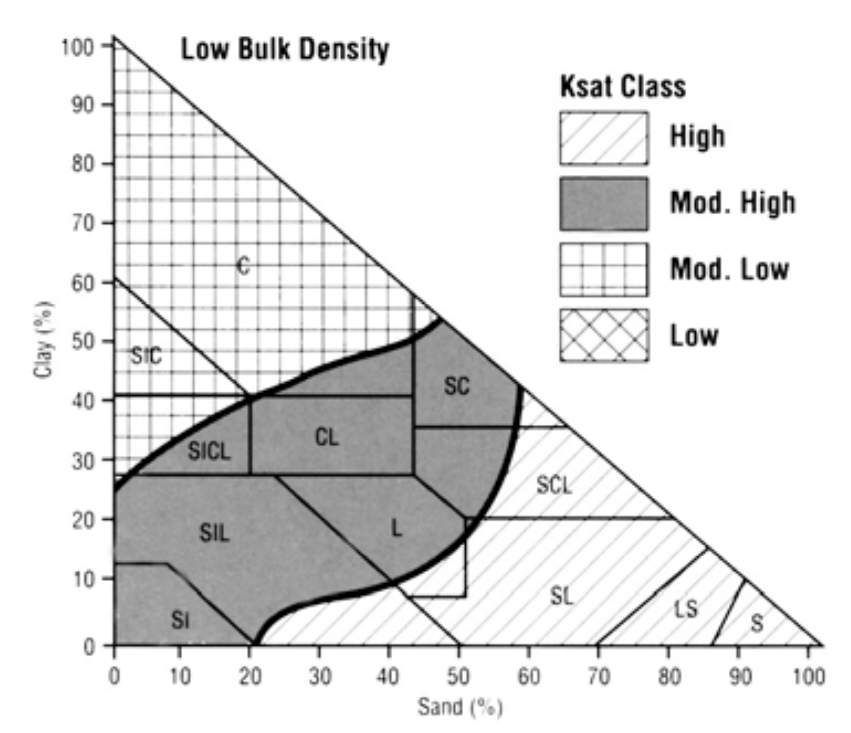

# Libraries installation

The first library installed is owslib. This library will be used to load the WCS maps directly form the SoilGrid maps server.
The second library installed is rasterio. This library allows to elaborate save and load the raster files. It will be used to elaborate the maps loaded form SoilGrid.

In [1]:
pip install owslib

     |████████████████████████████████| 216 kB 8.3 MB/s 
     |████████████████████████████████| 6.3 MB 23.2 MB/s 


In [2]:
pip install rasterio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


# Load data

The next step in the code is to load the data. The input data are from the SoilGrid system. SoilGrid is a machine learning method for mapping the spatial distribution of soil properties at a global scale. (for more details: https://www.isric.org/explore/soilgrids)

It is firstly selected the area of interest. The area should be provided as a box expressed in coordinates in CRS (coordinate reference system) EPSG 54012. Once the area is selected, the code will load Clay content, sand content bulk density information from the server. After each upload, the code will save a geolocated raster image (.tif format) and display the saved information.

In [3]:
# area selection (coords. box) it must be provided the bottom lef corner coordinates followed by the top right corner cordinates
bbox = (540000, 5400000, 1100000, 5740000)

In [4]:
# importing the WCS data loading function istalled in the previous section of the code.
from owslib.wcs import WebCoverageService
# importing the WCS data.
clay_wcs = WebCoverageService('http://maps.isric.org/mapserv?map=/map/clay.map', version='1.0.0', timeout=120)
# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_0-5cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_0-5_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
import rasterio
clay0_5 = rasterio.open(".northIT_clay_0-5_mean.tif", driver="GTiff")

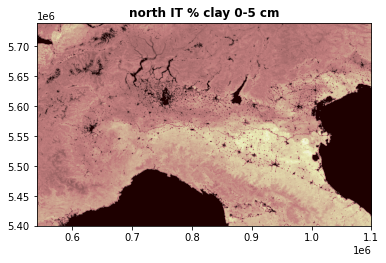

In [5]:
# load the plot function od rasterio
from rasterio import plot as rplt
%matplotlib inline
# plot the georeferenced data
rplt.show(clay0_5, title='north IT % clay 0-5 cm', cmap='pink')

In [6]:
# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_5-15cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_5-15_mean.tif', 'wb') as file:
    file.write(response.read())
# open the saved file as a raster
clay5_15 = rasterio.open(".northIT_clay_5-15_mean.tif", driver="GTiff")

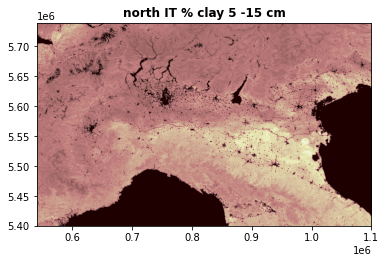

In [7]:
# plot the georeferenced data
rplt.show(clay5_15, title='north IT % clay 5 -15 cm', cmap='pink')

In [8]:
# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_15-30cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_15-30_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
clay15_30 = rasterio.open(".northIT_clay_15-30_mean.tif", driver="GTiff")

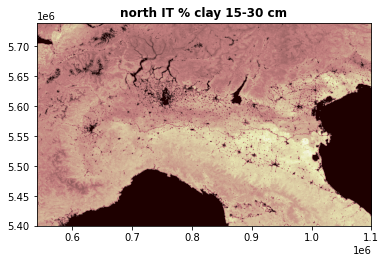

In [9]:
# plot the georeferenced data
rplt.show(clay15_30, title='north IT % clay 15-30 cm', cmap='pink')

In [10]:
# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_30-60cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_30-60_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
clay30_60 = rasterio.open(".northIT_clay_30-60_mean.tif", driver="GTiff")

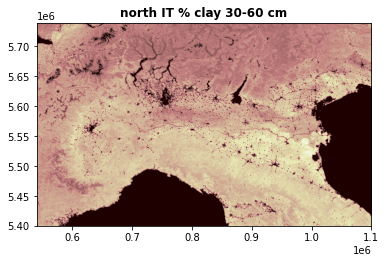

In [11]:
# plot the georeferenced data
rplt.show(clay30_60, title='north IT % clay 30-60 cm', cmap='pink')

In [12]:
# load the clay content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = clay_wcs.getCoverage(
    identifier='clay_60-100cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_clay_60-100_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
clay60_100 = rasterio.open(".northIT_clay_60-100_mean.tif", driver="GTiff")


In [13]:
#evaluate the weighted average in the first meter depth
clay0_100 = clay0_5.read(1)*(5/100) + clay5_15.read(1)*(10/100) + clay15_30.read(1)*(15/100) + clay30_60.read(1)*(30/100) + clay60_100.read(1)*(40/100)
clay = clay0_5.meta
clay.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('northIT_clay_0-100_mean.tif', 'w', **clay) as dst:
        dst.write_band(1, clay0_100.astype(rasterio.float32))
#open the saved file
clay = rasterio.open("northIT_clay_0-100_mean.tif", driver="GTiff")

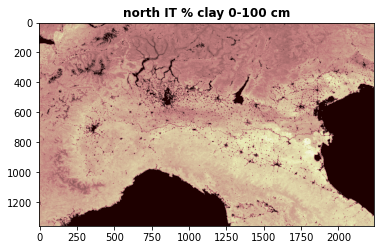

In [14]:
# plot the georeferenced data
rplt.show(clay0_100, title='north IT % clay 0-100 cm', cmap='pink')

In [15]:
# importing the WCS data.
sand_wcs = WebCoverageService('http://maps.isric.org/mapserv?map=/map/sand.map', version='1.0.0')
# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_0-5cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_0-5_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand0_5 = rasterio.open(".northIT_sand_0-5_mean.tif", driver="GTiff")

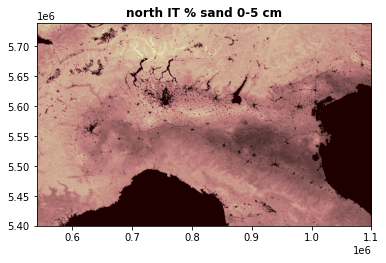

In [16]:
# plot the georeferenced data
rplt.show(sand0_5, title='north IT % sand 0-5 cm', cmap='pink')

In [17]:
# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_5-15cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_5-15_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand5_15 = rasterio.open(".northIT_sand_5-15_mean.tif", driver="GTiff")

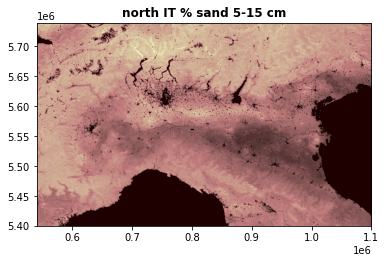

In [18]:
# plot the georeferenced data
rplt.show(sand5_15, title='north IT % sand 5-15 cm', cmap='pink')

In [19]:
# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_15-30cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_15-30_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand15_30 = rasterio.open(".northIT_sand_15-30_mean.tif", driver="GTiff")

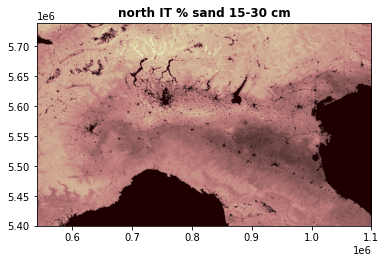

In [20]:
# plot the georeferenced data
rplt.show(sand15_30, title='north IT % sand 15-30 cm', cmap='pink')

In [21]:
# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_30-60cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_30-60_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand30_60 = rasterio.open(".northIT_sand_30-60_mean.tif", driver="GTiff")

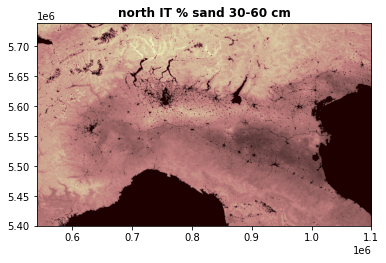

In [22]:
# plot the georeferenced data
rplt.show(sand30_60, title='north IT % sand 30-60 cm', cmap='pink')

In [23]:
# load the sand content maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = sand_wcs.getCoverage(
    identifier='sand_60-100cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_sand_60-100_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
sand60_100 = rasterio.open(".northIT_sand_60-100_mean.tif", driver="GTiff")

In [24]:
#evaluate the weighted average in the first meter depth
sand0_100 = sand0_5.read(1)*(5/100) + sand5_15.read(1)*(10/100) + sand15_30.read(1)*(15/100) + sand30_60.read(1)*(30/100) + sand60_100.read(1)*(40/100)
sand = sand0_5.meta
sand.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('northIT_sand_0-100_mean.tif', 'w', **sand) as dst:
        dst.write_band(1, sand0_100.astype(rasterio.float32))
#open the saved file
sand = rasterio.open("northIT_sand_0-100_mean.tif", driver="GTiff")

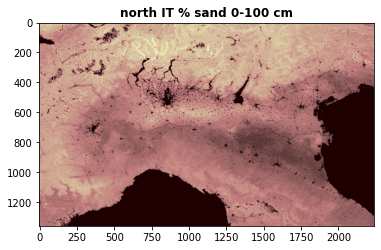

In [25]:
# plot the georeferenced data
rplt.show(sand0_100, title='north IT % sand 0-100 cm', cmap='pink')

In [26]:
# importing the WCS data.
bdod_wcs = WebCoverageService('http://maps.isric.org/mapserv?map=/map/bdod.map', version='1.0.0')
# load the bulck density maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = bdod_wcs.getCoverage(
    identifier='bdod_0-5cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_bdod_0-5_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
bdod0_5 = rasterio.open(".northIT_bdod_0-5_mean.tif", driver="GTiff")

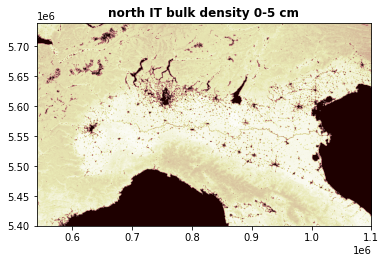

In [27]:
# plot the georeferenced data
rplt.show(bdod0_5, title='north IT bulk density 0-5 cm', cmap='pink')

In [28]:
# load the bulk density maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = bdod_wcs.getCoverage(
    identifier='bdod_5-15cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_bdod_5-15_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
bdod5_15 = rasterio.open(".northIT_bdod_5-15_mean.tif", driver="GTiff")

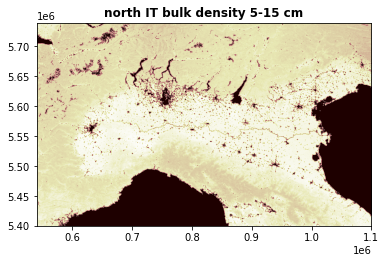

In [29]:
# plot the georeferenced data
rplt.show(bdod5_15, title='north IT bulk density 5-15 cm', cmap='pink')

In [30]:
# load the bulk density maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = bdod_wcs.getCoverage(
    identifier='bdod_15-30cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_bdod_15-30_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
bdod15_30 = rasterio.open(".northIT_bdod_15-30_mean.tif", driver="GTiff")

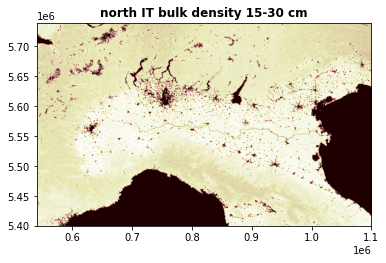

In [31]:
# plot the georeferenced data
rplt.show(bdod15_30, title='north IT bulk density 15-30 cm', cmap='pink')

In [32]:
# load the bulk density maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = bdod_wcs.getCoverage(
    identifier='bdod_30-60cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_bdod_30-60_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
bdod30_60 = rasterio.open(".northIT_bdod_30-60_mean.tif", driver="GTiff")

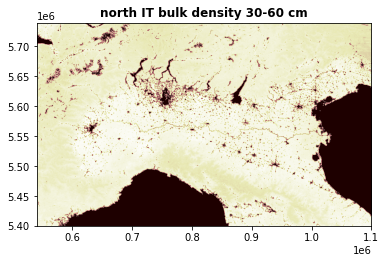

In [33]:
# plot the georeferenced data
rplt.show(bdod30_60, title='north IT bulk density 30-60 cm', cmap='pink')

In [34]:
# load the bulck density maps providing the server the map name, the reference system (only few RS are work properly), the pre-defined area object, the resolution and the data format.
response = bdod_wcs.getCoverage(
    identifier='bdod_60-100cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
# save the loaded file
with open('.northIT_bdod_60-100_mean.tif', 'wb') as file:
    file.write(response.read())
# import the saved file as a raster
bdod60_100 = rasterio.open(".northIT_bdod_60-100_mean.tif", driver="GTiff")

In [35]:
#evaluate the weighted average in the first meter depth
bdod0_100 = bdod0_5.read(1)*(5/100) + bdod5_15.read(1)*(10/100) + bdod15_30.read(1)*(15/100) + bdod30_60.read(1)*(30/100) + bdod60_100.read(1)*(40/100)
bdod = bdod0_5.meta
bdod.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('northIT_bdod_0-100_mean.tif', 'w', **bdod) as dst:
        dst.write_band(1, bdod0_100.astype(rasterio.float32))
#open the saved file
bdod = rasterio.open("northIT_bdod_0-100_mean.tif", driver="GTiff")

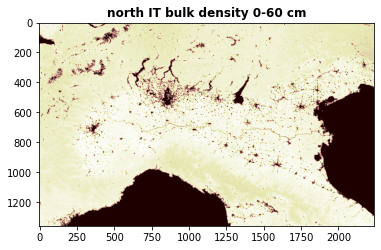

In [36]:
# plot the georeferenced data
rplt.show(bdod0_100, title='north IT bulk density 0-60 cm', cmap='pink')

In the next section is also loaded the silt content. It is done to check the data of clay and sand. The sum of the three concentrations must be one. the silt content will be used for the evalutation with Rosetta.

In [37]:
silt_wcs = WebCoverageService('http://maps.isric.org/mapserv?map=/map/silt.map', version='1.0.0')
response = silt_wcs.getCoverage(
    identifier='silt_0-5cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
with open('.northIT_silt_0-5_mean.tif', 'wb') as file:
    file.write(response.read())
silt0_5 = rasterio.open(".northIT_silt_0-5_mean.tif", driver="GTiff")

In [38]:
response = silt_wcs.getCoverage(
    identifier='silt_5-15cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
with open('.northIT_silt_5-15_mean.tif', 'wb') as file:
    file.write(response.read())
silt5_15 = rasterio.open(".northIT_silt_5-15_mean.tif", driver="GTiff")

In [39]:
response = silt_wcs.getCoverage(
    identifier='silt_15-30cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
with open('.northIT_silt_15-30_mean.tif', 'wb') as file:
    file.write(response.read())
silt15_30 = rasterio.open(".northIT_silt_15-30_mean.tif", driver="GTiff")

In [40]:
response = silt_wcs.getCoverage(
    identifier='silt_30-60cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
with open('.northIT_silt_30-60_mean.tif', 'wb') as file:
    file.write(response.read())
silt30_60 = rasterio.open(".northIT_silt_30-60_mean.tif", driver="GTiff")

In [41]:
response = silt_wcs.getCoverage(
    identifier='silt_60-100cm_mean', 
    crs='urn:ogc:def:crs:EPSG::54012',
    bbox=bbox, 
    resx=250, resy=250, 
    format='GEOTIFF_INT16')
with open('.northIT_silt_60-100_mean.tif', 'wb') as file:
    file.write(response.read())
silt60_100 = rasterio.open(".northIT_silt_60-100_mean.tif", driver="GTiff")

In [42]:
silt0_100 = silt0_5.read(1)*(5/100) + silt5_15.read(1)*(10/100) + silt15_30.read(1)*(15/100) + silt30_60.read(1)*(30/100) + silt60_100.read(1)*(40/100)
silt = silt0_5.meta
silt.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('northIT_silt_0-100_mean.tif', 'w', **silt) as dst:
        dst.write_band(1, silt0_100.astype(rasterio.float32))
#open the saved file
silt = rasterio.open("northIT_silt_0-100_mean.tif", driver="GTiff")

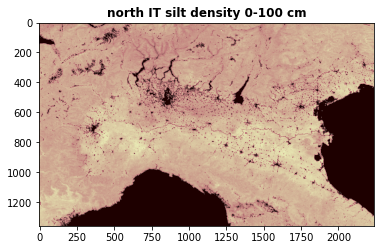

In [43]:
# plot the georeferenced data
rplt.show(silt0_100, title='north IT silt density 0-100 cm', cmap='pink')

Text(0.5, 1.0, 'verification graph')

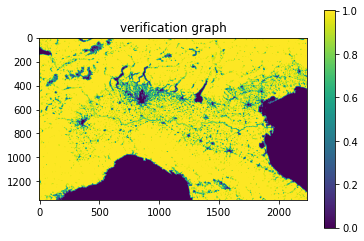

In [44]:
#import mat plot lib in order to plot the color bar
import matplotlib.pyplot as plt
#sum Clay Sand and Silt content (in g/kg) and divide it by 1000 to obtain a fraction
verifica = (sand.read(1)+silt.read(1)+clay.read(1))/1000
#plot the image and the color bar.
plt.imshow(verifica)
plt.colorbar()
plt.title('verification graph')


# Load bulk density table tables

The following step is to load the digitalized information from the tables previously shown for Ksat group selection.
The data has been digitalized and stored in an .xslx  (Ksat.xslx) file as a series of points forming polygons. These polygons will be used the following sections of the program assign the group to the geolocated data.
The Ksat.xlsx file attached to the code must be in the same directory of the code program.
To adjust the data for a given area (e.g., using in situ detailed information) you can edit the Ksat.xlsx file.

In [50]:
# import the pandas library for the dataframe managing
import pandas as pd
# import form the shaply library the fuction point and Polygon to trasform the 
# input raster gfeoreferenced data into a table point object and to transform 
# the loaded Table's polygon point in to a Polygon object
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

#first check of input data, if the poin are out of the polygon data raise an error
if ((sand.read(1)+silt.read(1))> 1000).any():
    raise Exception ('sand and clay % excede the 100%. check the input data!')

# load data from the .xlsx file and transform them in Polygons 
hbd=pd.read_excel('Ksat.xlsx',sheet_name='high bulk density poli') #high bulk density
hbd_1 = pd.DataFrame(hbd, columns= ['poligono 1 x','poligono 1 y'])
hbd_1.dropna(subset = ["poligono 1 x"], inplace=True)
hbd_1p=Polygon(hbd_1.values.tolist())
hbd_2 = pd.DataFrame(hbd, columns= ['poligono 2 x','poligono 2 y'])
hbd_2.dropna(subset = ["poligono 2 x"], inplace=True)
hbd_2p=Polygon(hbd_2.values.tolist())
hbd_3 = pd.DataFrame(hbd, columns= ['poligono 3 x','poligono 3 y'])
hbd_3p=Polygon(hbd_3.values.tolist())
hbd_3.dropna(subset = ["poligono 3 x"], inplace=True)
hbd_4 = pd.DataFrame(hbd, columns= ['poligono 4 x','poligono 4 y'])
hbd_4.dropna(subset = ["poligono 4 x"], inplace=True)
hbd_4p=Polygon(hbd_4.values.tolist())
hbd_5 = pd.DataFrame(hbd, columns= ['poligono 5 x','poligono 5 y'])
hbd_5.dropna(subset = ["poligono 5 x"], inplace=True)
hbd_5p=Polygon(hbd_5.values.tolist())

In [51]:
mbd=pd.read_excel('Ksat.xlsx',sheet_name='med bulk density poli') #med bulk density
mbd_1 = pd.DataFrame(mbd, columns= ['poligono 1 x','poligono 1 y'])
mbd_1.dropna(subset = ["poligono 1 x"], inplace=True)
mbd_1p=Polygon(mbd_1.values.tolist())
mbd_2 = pd.DataFrame(mbd, columns= ['poligono 2 x','poligono 2 y'])
mbd_2.dropna(subset = ["poligono 2 x"], inplace=True)
mbd_2p=Polygon(mbd_2.values.tolist())
mbd_3 = pd.DataFrame(mbd, columns= ['poligono 3 x','poligono 3 y'])
mbd_3p=Polygon(mbd_3.values.tolist())
mbd_3.dropna(subset = ["poligono 3 x"], inplace=True)
mbd_4 = pd.DataFrame(mbd, columns= ['poligono 4 x','poligono 4 y'])
mbd_4.dropna(subset = ["poligono 4 x"], inplace=True)
mbd_4p=Polygon(mbd_4.values.tolist())
mbd_5 = pd.DataFrame(mbd, columns= ['poligono 5 x','poligono 5 y'])
mbd_5.dropna(subset = ["poligono 5 x"], inplace=True)
mbd_5p=Polygon(mbd_5.values.tolist())
mbd_6 = pd.DataFrame(mbd, columns= ['poligono 6 x','poligono 6 y'])
mbd_6.dropna(subset = ["poligono 6 x"], inplace=True)
mbd_6p=Polygon(mbd_6.values.tolist())

In [52]:
lbd=pd.read_excel('Ksat.xlsx',sheet_name='low bulk density poli') #low bulk density
lbd_1 = pd.DataFrame(lbd, columns= ['poligono 1 x','poligono 1 y'])
lbd_1.dropna(subset = ["poligono 1 x"], inplace=True)
lbd_1p=Polygon(lbd_1.values.tolist())
lbd_2 = pd.DataFrame(lbd, columns= ['poligono 2 x','poligono 2 y'])
lbd_2.dropna(subset = ["poligono 2 x"], inplace=True)
lbd_2p=Polygon(lbd_2.values.tolist())
lbd_3 = pd.DataFrame(lbd, columns= ['poligono 3 x','poligono 3 y'])
lbd_3p=Polygon(lbd_3.values.tolist())
lbd_3.dropna(subset = ["poligono 3 x"], inplace=True)
lbd_4 = pd.DataFrame(lbd, columns= ['poligono 4 x','poligono 4 y'])
lbd_4.dropna(subset = ["poligono 4 x"], inplace=True)
lbd_4p=Polygon(lbd_4.values.tolist())
lbd_5 = pd.DataFrame(lbd, columns= ['poligono 5 x','poligono 5 y'])
lbd_5.dropna(subset = ["poligono 5 x"], inplace=True)
lbd_5p=Polygon(lbd_5.values.tolist())
lbd_6 = pd.DataFrame(lbd, columns= ['poligono 6 x','poligono 6 y'])
lbd_6.dropna(subset = ["poligono 6 x"], inplace=True)
lbd_6p=Polygon(lbd_6.values.tolist())
lbd_7 = pd.DataFrame(lbd, columns= ['poligono 7 x','poligono 7 y'])
lbd_7.dropna(subset = ["poligono 7 x"], inplace=True)
lbd_7p=Polygon(lbd_7.values.tolist())

# Bulk density group assignement

in the next section the code will first transform the raster file into a dataframe and adjust the unit of measurement of the data to make it compatible with the tables.

Then a function will be defined that given the clay content, soil content, and bulk density will assign a bulk density group for each raster pixel.
the possible groups are:
- Low bulk density = 1
- Medium bulk density = 2
- High bulk density = 3
- Not enough data = 0
- Not soil = -1

When the calculation is completed, the program will plot the results.
The computatipn may take minutes.

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
#transform the input data ind datagrame and det them in the tables unit of measure
x = sand.read(1)/1000
y = clay.read(1)/1000
z = bdod.read(1)/100

In [55]:
# import numpy because it will be needed in the definde fucntion
import numpy as np
# define a function for the bulk density class selection
def bd_group_selector(x,y,z,lbd_6p,lbd_5p,lbd_4p,lbd_3p,lbd_2p,lbd_1p,lbd_7p,mbd_6p,mbd_5p,mbd_4p,mbd_3p,mbd_2p,mbd_1p,hbd_5p,hbd_4p,hbd_3p,hbd_2p,hbd_1p):
  bd_group = np.zeros(np.shape(x))
  for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
     point = Point(x[i,j],y[i,j])
     if x[i,j] == 0 and y[i,j] == 0: #mare o  no data
       bd_group[i,j] = -1
     elif lbd_7p.contains(point) and z[i,j]<1.19:
       bd_group[i,j] = 1
     elif lbd_6p.contains(point) and z[i,j]<0.93:
       bd_group[i,j] = 1
     elif lbd_5p.contains(point) and z[i,j]<1.32:
       bd_group[i,j] = 1
     elif lbd_4p.contains(point) and z[i,j]<1.06:
       bd_group[i,j] = 1
     elif lbd_3p.contains(point) and z[i,j]<1.32:
       bd_group[i,j] = 1
     elif lbd_2p.contains(point) and z[i,j]<1.06:
       bd_group[i,j] = 1
     elif lbd_1p.contains(point) and z[i,j]<0.93:  
       bd_group[i,j] = 1 
     elif hbd_5p.contains(point) and 1.72<z[i,j]:
       bd_group[i,j] = 3      
     elif hbd_4p.contains(point) and 1.19<z[i,j]:
       bd_group[i,j] = 3 
     elif hbd_3p.contains(point) and 1.46<z[i,j]:
       bd_group[i,j] = 3 
     elif hbd_2p.contains(point) and 1.59<z[i,j]:
       bd_group[i,j] = 3 
     elif hbd_1p.contains(point) and 1.32<z[i,j]:
       bd_group[i,j] = 3
     elif mbd_6p.contains(point) and 1.59<=z[i,j]<=1.72:
       bd_group[i,j] = 2
     elif mbd_5p.contains(point) and 1.48<=z[i,j]<=1.72:
       bd_group[i,j] = 2
     elif mbd_4p.contains(point) and 0.93<=z[i,j]<=1.19:
       bd_group[i,j] = 2
     elif mbd_3p.contains(point) and 1.19<=z[i,j]<=1.46:
       bd_group[i,j] = 2
     elif mbd_2p.contains(point) and 1.30<=z[i,j]<=1.48:
       bd_group[i,j] = 2
     else:
       bd_group[i,j] = 0
  return bd_group


Text(0, 0.5, 'Row #')

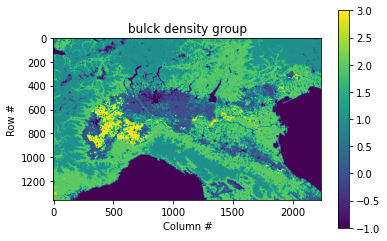

In [56]:
#call the classificatoin function
bd_group = bd_group_selector(x,y,z,lbd_6p,lbd_5p,lbd_4p,lbd_3p,lbd_2p,lbd_1p,lbd_7p,mbd_6p,mbd_5p,mbd_4p,mbd_3p,mbd_2p,mbd_1p,hbd_5p,hbd_4p,hbd_3p,hbd_2p,hbd_1p)

# plot the results
plt.imshow(bd_group)
plt.colorbar()
plt.title('bulck density group')
plt.xlabel('Column #')
plt.ylabel('Row #')

# Ksat group estimation 

In the last section the Ksat group is calculated. In the next section the tables will be loaded and converted to polygons. Then the code, based on the obtained apparent density group, will select the table and evaluate the Ksat group. The group is assigned as an integer (the variable will be a float object because it comes from float data). The groups assigned are: 
- Low Ksat = 1
- Moderately low Ksat = 2
- Moderately High Ksat = 3
- High Ksat = 4
- Not enough data = 0
- Not soil = -1

The number of pixels with insufficient data can be controlled. It is given in terms of number of pixels without data/total number of pixels.
Finally, the result obtained is plotted and saved as a georeferenced image (.tif format).


In [57]:
# Ksat Goup table loading 
Ksat=pd.read_excel('Ksat.xlsx',sheet_name='GI High bulk') #med bulk density
hb_l_ksat= pd.DataFrame(Ksat, columns= ['low x','low y'])
hb_l_ksat.dropna(subset = ["low x"], inplace=True)
hb_l_ksatp=Polygon(hb_l_ksat.values.tolist())
hb_ml_ksat = pd.DataFrame(Ksat, columns= ['mod low x','mod low y'])
hb_ml_ksat.dropna(subset = ["mod low x"], inplace=True)
hb_ml_ksatp = Polygon(hb_ml_ksat.values.tolist())
hb_mh_ksat = pd.DataFrame(Ksat, columns= ['mod high x','mod high y'])
hb_mh_ksat.dropna(subset = ['mod high x'], inplace=True)
hb_mh_ksatp=Polygon(hb_mh_ksat.values.tolist())

Ksat=pd.read_excel('Ksat.xlsx',sheet_name='GI Med bulk') #med bulk density
mb_l_ksat= pd.DataFrame(Ksat, columns= ['low x','low y'])
mb_l_ksat.dropna(subset = ["low x"], inplace=True)
mb_l_ksatp=Polygon(mb_l_ksat.values.tolist())
mb_ml_ksat = pd.DataFrame(Ksat, columns= ['mod low x','mod low y'])
mb_ml_ksat.dropna(subset = ["mod low x"], inplace=True)
mb_ml_ksatp = Polygon(mb_ml_ksat.values.tolist())
mb_mh_ksat = pd.DataFrame(Ksat, columns= ['mod high x','mod high y'])
mb_mh_ksat.dropna(subset = ['mod high x'], inplace=True)
mb_mh_ksatp=Polygon(mb_mh_ksat.values.tolist())
mb_h_ksat = pd.DataFrame(Ksat, columns= ['high x','high y'])
mb_h_ksat.dropna(subset = ['high x'], inplace=True)
mb_h_ksatp=Polygon(mb_h_ksat.values.tolist())


Ksat=pd.read_excel('Ksat.xlsx',sheet_name='GI Low bulk') #med bulk density
lb_ml_ksat = pd.DataFrame(Ksat, columns= ['mod low x','mod low y'])
lb_ml_ksat.dropna(subset = ["mod low x"], inplace=True)
lb_ml_ksatp = Polygon(lb_ml_ksat.values.tolist())
lb_mh_ksat = pd.DataFrame(Ksat, columns= ['mod high x','mod high y'])
lb_mh_ksat.dropna(subset = ['mod high x'], inplace=True)
lb_mh_ksatp=Polygon(lb_mh_ksat.values.tolist())
lb_h_ksat = pd.DataFrame(Ksat, columns= ['high x','high y'])
lb_h_ksat.dropna(subset = ['high x'], inplace=True)
lb_h_ksatp=Polygon(lb_h_ksat.values.tolist())


#Ksat Group assignement

GKsat = np.zeros(np.shape(x))
GKsatm = (1)
for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
        point = Point(x[i,j],y[i,j])
        if bd_group[i,j] == -1: #mare lago o no data
            GKsat[i,j] = -1
        elif bd_group [i,j] == 1:
            if lb_ml_ksatp.contains(point):
                GKsat[i,j] = 2
            elif lb_mh_ksatp.contains(point):
                GKsat[i,j] = 3
            elif lb_h_ksatp.contains(point):
                GKsat[i,j] = 4
        elif bd_group [i,j] == 2:
            if mb_l_ksatp.contains(point):
                GKsat[i,j] = 1
            elif mb_ml_ksatp.contains(point):
                GKsat[i,j] = 2
            elif mb_mh_ksatp.contains(point):
                GKsat[i,j] = 3
            elif mb_h_ksatp.contains(point):
                GKsat[i,j] = 4
        elif bd_group [i,j] == 3:
            if hb_l_ksatp.contains(point):
                GKsat[i,j] = 1
            elif hb_ml_ksatp.contains(point):
                GKsat[i,j] = 2
            elif hb_mh_ksatp.contains(point):
                GKsat[i,j] = 3
        elif bd_group [i,j] == 0:
            GKsat[i,j] = GKsatm
        Gksatm = GKsat[i,j] # dato precedente: se il dato non è presente viene assegnato il gruppo della cella accanto



In [58]:
#fraction of the numer of cells with not enough data
print(sum(sum(bd_group==0))/(np.shape(bd_group)[0]*np.shape(bd_group)[1]))

0.10931000525210084


Text(0.5, 1.0, 'Ksat group')

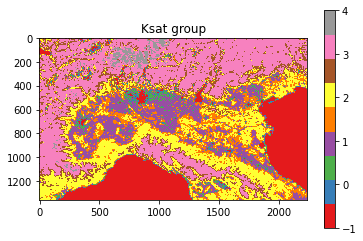

In [59]:
# result plotting 
plt.imshow(GKsat, cmap='Set1',)
plt.colorbar()
plt.title('Ksat group')

In [60]:
# save Ksat group
Group_ksat = silt.meta
Group_ksat.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('Group_ksat.tif', 'w', **Group_ksat) as dst:
        dst.write_band(1, GKsat.astype(rasterio.float32))

# Ksat estimation with rosetta

in this section the Ksat will be evaluated with ROSETTA version 3-alpha (3a). Rosetta offers PTF that allow prediction of the hydraulic properties. ROSETTA includes different modules that are differentiate respect the required input. The simplest model contained is based on a lookup table that provides class average hydraulic parameter for every USDA soil textural class. More complex models are based on neural network analyses and typically more input they require more accurate prediction they give. The input available are: the sand, silt, clay soil percentages content and bulk density.The program will use a third-party python code that contains an improved version of ROSETTA. (Zhang and Schaap, 2017).
The code will firstly generate the inputs need by the program. The available data will be saved in a .TXT file. The file contains 4 columns (sand, silt and clay percentages and bulk density) and a number of row equal to the number of pixels of the raster files. The output is postprocessed and is saved only the Ksat value.
To reduce memory required (RAM memory) the inputs are divided in 100 of sub input dataset and the output are estimated separately and re-assembled after the Ksat evaluation.

please modify the path of Rosetta_3.sqlite and Rpredict.py before to run the  code.


In [61]:
# UoM fixing
sand_c = sand.read(1).flatten()/10
silt_c = silt.read(1).flatten()/10
clay_c = clay.read(1).flatten()/10
bd_c = bdod.read(1).flatten()/100
# dataset splitting
split_sand_c = np.split(sand_c,100)
split_silt_c = np.split(silt_c,100)
split_clay_c = np.split(clay_c,100)
split_bd_c = np.split(bd_c,100)

#run the code for the sub datset prevously generated
dim=(np.shape(sand_c)[0])
Ksat = np.zeros(dim)
start = 0
for i in range(100):
  input_data = np.column_stack((split_sand_c[i],split_silt_c[i],split_clay_c[i],split_bd_c[i]))
  np.savetxt('input_data.txt', input_data)
  #create an empity output file
  output_data  = np.array([0,0])
  np.savetxt('output_data.txt', output_data)
  %run /content/drive/MyDrive/Rosetta_3/Rpredict.py   -i   input_data.txt  -o  output_data.txt --predict  --sqlite=/content/drive/MyDrive/Rosetta_3/sqlite/Rosetta.sqlite
  output = np.loadtxt('output_data.txt', delimiter=',')
  finish = start+int(dim/100) 
  Ksat [start:finish] = output[:,4]
  start = finish
  print(i)

input_data.txt
[[0.4596     0.4788     0.50765002 ... 0.43814999 0.43510002 0.46134999]
 [0.29449999 0.29985002 0.29460001 ... 0.35374999 0.35410002 0.3504    ]
 [0.24510001 0.22130001 0.19769999 ... 0.20810001 0.21105    0.18799999]
 [1.49449992 1.48549998 1.48600006 ... 1.28600001 1.30600011 1.30050004]]
Getting models from database


/content/drive/MyDrive/Rosetta_3/Rpredict.py:39: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ANN_Module import PTF_MODEL


Getting models from database, done (1.4315049648284912 s)
[[0.4596     0.4788     0.50765002 ... 0.43814999 0.43510002 0.46134999]
 [0.29449999 0.29985002 0.29460001 ... 0.35374999 0.35410002 0.3504    ]
 [0.24510001 0.22130001 0.19769999 ... 0.20810001 0.21105    0.18799999]
 [1.49449992 1.48549998 1.48600006 ... 1.28600001 1.30600011 1.30050004]]
Processing
Processing done (83.83160471916199 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.69948179e-01 4.68208532e-01 1.23019083e-02 2.37632600e+00
  1.22168622e+02]
 [1.70047770e-01 4.69269783e-01 1.22900489e-02 2.37805365e+00
  1.23933277e+02]
 [1.70013923e-01 4.69191609e-01 1.22949424e-02 2.37854223e+00
  1.23942306e+02]
 ...
 [1.72911001e-01 4.93463459e-01 1.19180540e-02 2.39141701e+00
  1.65046787e+02]
 [1.72624131e-01 4.91023146e-01 1.19555872e-02 2.39153931e+00
  1.60588474e+02]
 [1.72679537e-01 4.91675286e-01 1.19484568e-02 2.39205611e+00
  1.61919846e+02]]
0


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


input_data.txt
[[0.43799999 0.43285    0.42335001 ... 0.44445002 0.44495001 0.44365001]
 [0.38679999 0.39289999 0.39535001 ... 0.3554     0.35514998 0.3538    ]
 [0.17480001 0.17385    0.1813     ... 0.20055    0.19949999 0.2023    ]
 [1.29899991 1.30350006 1.29100001 ... 1.26499999 1.27499998 1.27900004]]
Getting models from database
Getting models from database, done (0.11802506446838379 s)
[[0.43799999 0.43285    0.42335001 ... 0.44445002 0.44495001 0.44365001]
 [0.38679999 0.39289999 0.39535001 ... 0.3554     0.35514998 0.3538    ]
 [0.17480001 0.17385    0.1813     ... 0.20055    0.19949999 0.2023    ]
 [1.29899991 1.30350006 1.29100001 ... 1.26499999 1.27499998 1.27900004]]
Processing
Processing done (113.54171442985535 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72689893e-01 4.91846141e-01 1.19402667e-02 2.39198921e+00
  1.62229670e+02]
 [1.72624047e-01 4.91295886e-01 1.19478003e-02 2.39197447e+00
  1.61223144e+02]
 [1.72813001e-01 4.92828195e-01 1.19227457e-02 2.3

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (80.04865717887878 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73006406e-01 4.94314679e-01 1.19055071e-02 2.39139606e+00
  1.66644076e+02]
 [1.73106652e-01 4.95171216e-01 1.18938828e-02 2.39129387e+00
  1.68242561e+02]
 [1.72774436e-01 4.92579143e-01 1.19337142e-02 2.39217736e+00
  1.63623745e+02]
 ...
 [1.73381233e-01 4.97549396e-01 1.18451107e-02 2.39009188e+00
  1.72562138e+02]
 [1.73583060e-01 4.99324872e-01 1.18197749e-02 2.38950935e+00
  1.75938864e+02]
 [1.73386017e-01 4.97666386e-01 1.18492702e-02 2.39048367e+00
  1.72893444e+02]]
2
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.42504999 0.41545001 0.40489998 ... 0.44284999 0.44254997 0.42660001]
 [0.3944     0.40364999 0.41665    ... 0.35479999 0.35764998 0.36739999]
 [0.1806     0.18099999 0.17830001 ... 0.2022     0.19964999 0.2057    ]
 [1.25800002 1.25800002 1.25300002 ... 1.19099998 1.21249998 1.21449995]]
Getting models from database
Getting models from database, done (0.09499120712280273 s)
[[0.42504999 0.41545001 0.40489998 ... 0.44284999 0.44254997 0.42660001]
 [0.3944     0.40364999 0.41665    ... 0.35479999 0.35764998 0.36739999]
 [0.1806     0.18099999 0.17830001 ... 0.2022     0.19964999 0.2057    ]
 [1.25800002 1.25800002 1.25300002 ... 1.19099998 1.21249998 1.21449995]]
Processing
Processing done (104.39839315414429 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73289224e-01 4.96866343e-01 1.18611071e-02 2.39080017e+00
  1.71412863e+02]
 [1.73290223e-01 4.96866374e-01 1.18593397e-02 2.39070426e+00
  1.71389745e+02]
 [1.73360450e-01 4.97476939e-01 1.18479365e-02 2.39042554e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.43554997 0.42815    0.42815    ... 0.36585    0.36750001 0.36804998]
 [0.38075    0.38240001 0.38240001 ... 0.42625001 0.42655    0.43035001]
 [0.18325    0.1895     0.1895     ... 0.20760001 0.2058     0.2016    ]
 [1.21700001 1.21399999 1.21399999 ... 1.15400004 1.15250003 1.14999998]]
Getting models from database
Getting models from database, done (0.10644268989562988 s)
[[0.43554997 0.42815    0.42815    ... 0.36585    0.36750001 0.36804998]
 [0.38075    0.38240001 0.38240001 ... 0.42625001 0.42655    0.43035001]
 [0.18325    0.1895     0.1895     ... 0.20760001 0.2058     0.2016    ]
 [1.21700001 1.21399999 1.21399999 ... 1.15400004 1.15250003 1.14999998]]
Processing
Processing done (80.97453808784485 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73878777e-01 5.01907842e-01 1.17883214e-02 2.38852788e+00
  1.80923327e+02]
 [1.73927724e-01 5.02282668e-01 1.17819885e-02 2.38815362e+00
  1.81592987e+02]
 [1.73927724e-01 5.02282668e-01 1.17819885e-02 2.38815362e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (81.64483189582825 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.69920852e-01 4.68076610e-01 1.22984483e-02 2.37610635e+00
  1.21956191e+02]
 [1.69978177e-01 4.68612953e-01 1.22933328e-02 2.37692089e+00
  1.22828831e+02]
 [1.69936335e-01 4.68253275e-01 1.22980481e-02 2.37649766e+00
  1.22269485e+02]
 ...
 [1.73287862e-01 4.96538330e-01 1.18733690e-02 2.39056000e+00
  1.70662179e+02]
 [1.73284066e-01 4.96479793e-01 1.18737026e-02 2.39049314e+00
  1.70529328e+02]
 [1.73312549e-01 4.96885037e-01 1.18575708e-02 2.39027165e+00
  1.71294671e+02]]
5
input_data.txt
[[0.38284999 0.38535002 0.38975    ... 0.         0.         0.        ]
 [0.41589999 0.41       0.40329999 ... 0.         0.         0.        ]
 [0.20125    0.20445    0.20694999 ... 0.         0.         0.        ]
 [1.25400007 1.25999999 1.26100004 ... 0.         0.         0.        ]]
Getting models from database
Getting models from database, done (0.11799049377441406 s)
[[0.38284999 0.38535002 0.3

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (109.19565844535828 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73370046e-01 4.97374211e-01 1.18474333e-02 2.38997965e+00
  1.72179124e+02]
 [1.73286804e-01 4.96641519e-01 1.18592815e-02 2.39021753e+00
  1.70806565e+02]
 [1.73274406e-01 4.96521204e-01 1.18621210e-02 2.39026507e+00
  1.70582141e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


6
input_data.txt
[[0.         0.         0.         ... 0.34385002 0.3355     0.33020002]
 [0.         0.         0.         ... 0.4465     0.4508     0.45429999]
 [0.         0.         0.         ... 0.20975    0.21375    0.2158    ]
 [0.         0.         0.         ... 1.21899998 1.21650004 1.22300005]]
Getting models from database
Getting models from database, done (0.11761307716369629 s)
[[0.         0.         0.         ... 0.34385002 0.3355     0.33020002]
 [0.         0.         0.         ... 0.4465     0.4508     0.45429999]
 [0.         0.         0.         ... 0.20975    0.21375    0.2158    ]
 [0.         0.         0.         ... 1.21899998 1.21650004 1.22300005]]
Processing
Processing done (84.77853083610535 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.33965001 0.34585002 0.34585002 ... 0.48970002 0.48615    0.49685001]
 [0.43855    0.43454999 0.43454999 ... 0.34260002 0.3405     0.31600001]
 [0.22130001 0.21955    0.21955    ... 0.16780001 0.17375    0.18744999]
 [1.21749997 1.22399998 1.22399998 ... 1.22899997 1.24000001 1.24199998]]
Getting models from database
Getting models from database, done (0.11380743980407715 s)
[[0.33965001 0.34585002 0.34585002 ... 0.48970002 0.48615    0.49685001]
 [0.43855    0.43454999 0.43454999 ... 0.34260002 0.3405     0.31600001]
 [0.22130001 0.21955    0.21955    ... 0.16780001 0.17375    0.18744999]
 [1.21749997 1.22399998 1.22399998 ... 1.22899997 1.24000001 1.24199998]]
Processing
Processing done (89.33780550956726 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73915398e-01 5.01878277e-01 1.17745784e-02 2.38719601e+00
  1.80488535e+02]
 [1.73820276e-01 5.01076232e-01 1.17872214e-02 2.38772617e+00
  1.78985758e+02]
 [1.73820276e-01 5.01076232e-01 1.17872214e-02 2.38772617e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (81.6739284992218 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73740025e-01 5.00852721e-01 1.18173665e-02 2.39000344e+00
  1.79144934e+02]
 [1.73514327e-01 4.98942494e-01 1.18437433e-02 2.39092619e+00
  1.75539979e+02]
 [1.73558633e-01 4.99312688e-01 1.18390151e-02 2.39076595e+00
  1.76236515e+02]
 ...
 [1.74577105e-01 5.07678416e-01 1.17019831e-02 2.38354035e+00
  1.91761774e+02]
 [1.74831886e-01 5.09844413e-01 1.16701418e-02 2.38139118e+00
  1.95916508e+02]
 [1.74716690e-01 5.08634325e-01 1.16871324e-02 2.38209012e+00
  1.93409473e+02]]
9
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.         0.         0.         ... 0.3951     0.37325001 0.34370002]
 [0.         0.         0.         ... 0.41       0.40175    0.43425   ]
 [0.         0.         0.         ... 0.19475    0.22499999 0.22215   ]
 [0.         0.         0.         ... 1.33649993 1.31350005 1.30600011]]
Getting models from database
Getting models from database, done (0.10450267791748047 s)
[[0.         0.         0.         ... 0.3951     0.37325001 0.34370002]
 [0.         0.         0.         ... 0.41       0.40175    0.43425   ]
 [0.         0.         0.         ... 0.19475    0.22499999 0.22215   ]
 [0.         0.         0.         ... 1.33649993 1.31350005 1.30600011]]
Processing
Processing done (86.69029641151428 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.36061716079711914 s)
[[0.36045    0.35729998 0.37529999 ... 0.42995    0.43189999 0.42035002]
 [0.4307     0.43715    0.4271     ... 0.32934999 0.33649999 0.33504999]
 [0.20874999 0.20555    0.19760001 ... 0.24085    0.2313     0.24460001]
 [1.30199993 1.28350008 1.296      ... 1.33449996 1.3175     1.34200001]]
Processing
Processing done (133.9088408946991 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72685227e-01 4.91507185e-01 1.19338171e-02 2.39085664e+00
  1.61306339e+02]
 [1.72950157e-01 4.93764360e-01 1.18980009e-02 2.39063856e+00
  1.65426615e+02]
 [1.72760003e-01 4.92230334e-01 1.19243937e-02 2.39109018e+00
  1.62696884e+02]
 ...
 [1.72241538e-01 4.87575776e-01 1.20112808e-02 2.39079965e+00
  1.54284337e+02]
 [1.72478319e-01 4.89638579e-01 1.19784631e-02 2.39122187e+00
  1.58008841e+02]
 [1.72137617e-01 4.86666089e-01 1.20241439e-02 2.39045851e+00
  1.52637866e+02]]
11
input_data.txt
[[0.41714999 0.44829997 0.         ... 0.349

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database
Getting models from database, done (0.1277604103088379 s)
[[0.41714999 0.44829997 0.         ... 0.3495     0.34739998 0.3524    ]
 [0.33570001 0.33950001 0.         ... 0.43149999 0.43695    0.4278    ]
 [0.24675    0.2122     0.         ... 0.2186     0.2155     0.21980001]
 [1.34249997 1.36199999 0.         ... 1.25050008 1.25150001 1.26199996]]
Processing
Processing done (138.04529118537903 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72133088e-01 4.86607249e-01 1.20247013e-02 2.39039129e+00
  1.52519274e+02]
 [1.71813957e-01 4.84207834e-01 1.20656129e-02 2.39031420e+00
  1.48507667e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 ...
 [1.73440013e-01 4.97818520e-01 1.18361770e-02 2.38929802e+00
  1.72862245e+02]
 [1.73422529e-01 4.97692806e-01 1.18373509e-02 2.38935998e+00
  1.72635407e+02]
 [1.73275177e-01 4.96409043e-01 1.18579976e-02 2.38979435e+00
  1.70237050e+02]]
12
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.36989999 0.37850001 0.3752     ... 0.48559999 0.50209999 0.51415002]
 [0.42074999 0.41435    0.41345    ... 0.32449999 0.32535002 0.29679999]
 [0.2095     0.20725    0.21105    ... 0.1899     0.17325    0.18905   ]
 [1.26550007 1.22949994 1.24749994 ... 1.22000003 1.21949995 1.23099995]]
Getting models from database
Getting models from database, done (0.105560302734375 s)
[[0.36989999 0.37850001 0.3752     ... 0.48559999 0.50209999 0.51415002]
 [0.42074999 0.41435    0.41345    ... 0.32449999 0.32535002 0.29679999]
 [0.2095     0.20725    0.21105    ... 0.1899     0.17325    0.18905   ]
 [1.26550007 1.22949994 1.24749994 ... 1.22000003 1.21949995 1.23099995]]
Processing
Processing done (133.9453547000885 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73213244e-01 4.95971336e-01 1.18669540e-02 2.39021090e+00
  1.69506630e+02]
 [1.73727404e-01 5.00389112e-01 1.18022133e-02 2.38854284e+00
  1.77809592e+02]
 [1.73473880e-01 4.98180675e-01 1.18348354e-02 2.38948646e+00
  1.73

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.55115002 0.56024998 0.59940004 ... 0.28945002 0.29705    0.28504997]
 [0.30320001 0.3026     0.26525    ... 0.42970002 0.43700001 0.45054999]
 [0.14580001 0.13755    0.13614999 ... 0.28120002 0.26629999 0.26440001]
 [1.24150002 1.28050005 1.29449999 ... 1.07050002 1.046      1.0165    ]]
Getting models from database
Getting models from database, done (0.11382341384887695 s)
[[0.55115002 0.56024998 0.59940004 ... 0.28945002 0.29705    0.28504997]
 [0.30320001 0.3026     0.26525    ... 0.42970002 0.43700001 0.45054999]
 [0.14580001 0.13755    0.13614999 ... 0.28120002 0.26629999 0.26440001]
 [1.24150002 1.28050005 1.29449999 ... 1.07050002 1.046      1.0165    ]]
Processing
Processing done (137.20261597633362 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73483599e-01 4.98863664e-01 1.18514001e-02 2.39162798e+00
  1.75580236e+02]
 [1.72912089e-01 4.94077020e-01 1.19253050e-02 2.39331601e+00
  1.66731480e+02]
 [1.72704683e-01 4.92366123e-01 1.19591275e-02 2.39393228e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (135.5736792087555 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73444856e-01 4.96997404e-01 1.18502759e-02 2.38784621e+00
  1.70766830e+02]
 [1.73389285e-01 4.96508566e-01 1.18574467e-02 2.38795453e+00
  1.69846377e+02]
 [1.73269732e-01 4.95578563e-01 1.18699209e-02 2.38833914e+00
  1.68170626e+02]
 ...
 [1.72927871e-01 4.93640014e-01 1.19096500e-02 2.39121657e+00
  1.65336396e+02]
 [1.72912339e-01 4.93516197e-01 1.19100139e-02 2.39117603e+00
  1.65097566e+02]
 [1.72767499e-01 4.92294872e-01 1.19303200e-02 2.39138762e+00
  1.62883596e+02]]
15
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.39895001 0.38935    0.39670002 ... 0.48914999 0.48275    0.47820002]
 [0.40200001 0.4032     0.40004998 ... 0.36449999 0.36390001 0.36445001]
 [0.19935    0.20745    0.20285    ... 0.14624999 0.15375    0.15700001]
 [1.29449999 1.30699992 1.3210001  ... 1.32449996 1.32600009 1.32300007]]
Getting models from database
Getting models from database, done (0.1346724033355713 s)
[[0.39895001 0.38935    0.39670002 ... 0.48914999 0.48275    0.47820002]
 [0.40200001 0.4032     0.40004998 ... 0.36449999 0.36390001 0.36445001]
 [0.19935    0.20745    0.20285    ... 0.14624999 0.15375    0.15700001]
 [1.29449999 1.30699992 1.3210001  ... 1.32449996 1.32600009 1.32300007]]
Processing
Processing done (137.15168023109436 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72781622e-01 4.92415635e-01 1.19260775e-02 2.39127316e+00
  1.63080161e+02]
 [1.72609410e-01 4.90896702e-01 1.19486543e-02 2.39115477e+00
  1.60271241e+02]
 [1.72401777e-01 4.89186163e-01 1.19765201e-02 2.39119921e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (159.88633823394775 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72106017e-01 4.87081104e-01 1.20211181e-02 2.39213774e+00
  1.53814572e+02]
 [1.71762142e-01 4.84224640e-01 1.20727788e-02 2.39158209e+00
  1.48870354e+02]
 [1.71780705e-01 4.84403633e-01 1.20685455e-02 2.39164119e+00
  1.49182153e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [1.71865894e-01 4.84464558e-01 1.20515398e-02 2.38961181e+00
  1.48752832e+02]
 [1.72590905e-01 4.90442181e-01 1.19565178e-02 2.39054728e+00
  1.59270347e+02]]
17
input_data.txt
[[0.38       0.38725001 0.38249999 ... 0.         0.         0.        ]
 [0.36435002 0.35874999 0.36104998 ... 0.         0.         0.        ]
 [0.25569999 0.25439999 0.25685    ... 0.         0.         0.        ]
 [1.31649995 1.33249998 1.35149992 ... 0.         0.         0.        ]]
Getting models from database


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.6571345329284668 s)
[[0.38       0.38725001 0.38249999 ... 0.         0.         0.        ]
 [0.36435002 0.35874999 0.36104998 ... 0.         0.         0.        ]
 [0.25569999 0.25439999 0.25685    ... 0.         0.         0.        ]
 [1.31649995 1.33249998 1.35149992 ... 0.         0.         0.        ]]
Processing
Processing done (158.25662899017334 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72520428e-01 4.89779872e-01 1.19684538e-02 2.39043962e+00
  1.58052105e+02]
 [1.72286809e-01 4.87829363e-01 1.20002823e-02 2.39027535e+00
  1.54588289e+02]
 [1.72014961e-01 4.85519648e-01 1.20359908e-02 2.38961294e+00
  1.50490414e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
18
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.         0.         0.         ... 0.3082     0.         0.        ]
 [0.         0.         0.         ... 0.43079999 0.         0.        ]
 [0.         0.         0.         ... 0.26089999 0.         0.        ]
 [0.         0.         0.         ... 1.23199999 0.         0.        ]]
Getting models from database
Getting models from database, done (0.10817551612854004 s)
[[0.         0.         0.         ... 0.3082     0.         0.        ]
 [0.         0.         0.         ... 0.43079999 0.         0.        ]
 [0.         0.         0.         ... 0.26089999 0.         0.        ]
 [0.         0.         0.         ... 1.23199999 0.         0.        ]]
Processing
Processing done (158.66007900238037 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.32604998 0.31999999 0.32770002 ... 0.4443     0.43785    0.43810001]
 [0.36485001 0.36704999 0.36050001 ... 0.39774999 0.38755    0.38749999]
 [0.3098     0.31260002 0.31195    ... 0.15810001 0.1742     0.17425001]
 [1.45249999 1.4339999  1.44550002 ... 1.34549999 1.34600008 1.34300005]]
Getting models from database
Getting models from database, done (0.12194418907165527 s)
[[0.32604998 0.31999999 0.32770002 ... 0.4443     0.43785    0.43810001]
 [0.36485001 0.36704999 0.36050001 ... 0.39774999 0.38755    0.38749999]
 [0.3098     0.31260002 0.31195    ... 0.15810001 0.1742     0.17425001]
 [1.45249999 1.4339999  1.44550002 ... 1.34549999 1.34600008 1.34300005]]
Processing
Processing done (159.14887738227844 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70618521e-01 4.73311109e-01 1.22126085e-02 2.37991692e+00
  1.29736285e+02]
 [1.70887274e-01 4.75550637e-01 1.21800961e-02 2.38203028e+00
  1.33328953e+02]
 [1.70720974e-01 4.74158913e-01 1.22012401e-02 2.38077031e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.2769205570220947 s)
[[0.47579998 0.47639999 0.4815     ... 0.37325001 0.37625    0.        ]
 [0.32800001 0.32934999 0.33220002 ... 0.4068     0.39629999 0.        ]
 [0.19614999 0.19425    0.18610001 ... 0.2203     0.22739999 0.        ]
 [1.31699991 1.34149992 1.32749999 ... 1.32000005 1.3210001  0.        ]]
Processing
Processing done (156.56001687049866 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72447273e-01 4.89670205e-01 1.19832621e-02 2.39206600e+00
  1.58298945e+02]
 [1.72090440e-01 4.86685566e-01 1.20303395e-02 2.39161438e+00
  1.52984150e+02]
 [1.72284804e-01 4.88382592e-01 1.20038149e-02 2.39210372e+00
  1.56043226e+02]
 ...
 [1.72434696e-01 4.89322003e-01 1.19713135e-02 2.39076864e+00
  1.57350540e+02]
 [1.72427405e-01 4.89206640e-01 1.19743506e-02 2.39070350e+00
  1.57123876e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
21
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.         0.         0.         ... 0.33115    0.32660002 0.3249    ]
 [0.         0.         0.         ... 0.42070001 0.42339998 0.4249    ]
 [0.         0.         0.         ... 0.24814999 0.25055    0.25029999]
 [0.         0.         0.         ... 1.34449995 1.34399998 1.34549999]]
Getting models from database
Getting models from database, done (0.1057891845703125 s)
[[0.         0.         0.         ... 0.33115    0.32660002 0.3249    ]
 [0.         0.         0.         ... 0.42070001 0.42339998 0.4249    ]
 [0.         0.         0.         ... 0.24814999 0.25055    0.25029999]
 [0.         0.         0.         ... 1.34449995 1.34399998 1.34549999]]
Processing
Processing done (158.8021252155304 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.5

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (160.6634340286255 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.71940576e-01 4.84793916e-01 1.20345473e-02 2.38860776e+00
  1.49038674e+02]
 [1.71542900e-01 4.81620355e-01 1.20905438e-02 2.38775520e+00
  1.43726597e+02]
 [1.71537237e-01 4.81506103e-01 1.20927434e-02 2.38757130e+00
  1.43499532e+02]
 ...
 [1.72876984e-01 4.93382804e-01 1.19261414e-02 2.39216337e+00
  1.65101090e+02]
 [1.72742563e-01 4.92225093e-01 1.19446488e-02 2.39227038e+00
  1.62978824e+02]
 [1.72787220e-01 4.92592340e-01 1.19385251e-02 2.39219636e+00
  1.63637051e+02]]
23
input_data.txt
[[0.4831     0.45854998 0.41695002 ... 0.2617     0.2509     0.25010002]
 [0.322      0.34099999 0.36905    ... 0.41145    0.428      0.43220001]
 [0.19489999 0.20039999 0.21364999 ... 0.32609999 0.32095    0.31805   ]
 [1.28550005 1.28600001 1.29949999 ... 1.41499996 1.42699993 1.42399991]]
Getting models from database


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.3432941436767578 s)
[[0.4831     0.45854998 0.41695002 ... 0.2617     0.2509     0.25010002]
 [0.322      0.34099999 0.36905    ... 0.41145    0.428      0.43220001]
 [0.19489999 0.20039999 0.21364999 ... 0.32609999 0.32095    0.31805   ]
 [1.28550005 1.28600001 1.29949999 ... 1.41499996 1.42699993 1.42399991]]
Processing
Processing done (158.79456400871277 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72902096e-01 4.93514314e-01 1.19245731e-02 2.39199322e+00
  1.65293992e+02]
 [1.72902020e-01 4.93457310e-01 1.19213202e-02 2.39170410e+00
  1.65112350e+02]
 [1.72722650e-01 4.91818578e-01 1.19400800e-02 2.39131915e+00
  1.61979265e+02]
 ...
 [1.71178691e-01 4.77862709e-01 1.21364859e-02 2.38330613e+00
  1.36947870e+02]
 [1.71001349e-01 4.76403318e-01 1.21554491e-02 2.38203662e+00
  1.34543123e+02]
 [1.71041129e-01 4.76764058e-01 1.21497592e-02 2.38237398e+00
  1.35140658e+02]]
24


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


input_data.txt
[[0.40670002 0.3933     0.39304999 ... 0.46904999 0.47305    0.47189999]
 [0.37345001 0.38925001 0.3883     ... 0.37535    0.3698     0.36004999]
 [0.21945    0.21785    0.2182     ... 0.15555    0.15674999 0.1682    ]
 [1.27450001 1.26250005 1.2615     ... 1.34549999 1.35149992 1.35800004]]
Getting models from database
Getting models from database, done (0.5293254852294922 s)
[[0.40670002 0.3933     0.39304999 ... 0.46904999 0.47305    0.47189999]
 [0.37345001 0.38925001 0.3883     ... 0.37535    0.3698     0.36004999]
 [0.21945    0.21785    0.2182     ... 0.15555    0.15674999 0.1682    ]
 [1.27450001 1.26250005 1.2615     ... 1.34549999 1.35149992 1.35800004]]
Processing
Processing done (159.38339853286743 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73091070e-01 4.94879555e-01 1.18914555e-02 2.39072392e+00
  1.67531213e+02]
 [1.73262985e-01 4.96347030e-01 1.18663462e-02 2.39021746e+00
  1.70220956e+02]
 [1.73278439e-01 4.96470388e-01 1.18645905e-02 2.39

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (159.87610507011414 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.71683789e-01 4.83444512e-01 1.20787504e-02 2.39072862e+00
  1.47383621e+02]
 [1.71860048e-01 4.84905309e-01 1.20571561e-02 2.39133496e+00
  1.49928981e+02]
 [1.71842123e-01 4.84780633e-01 1.20584687e-02 2.39132335e+00
  1.49720869e+02]
 ...
 [1.72494274e-01 4.89817213e-01 1.19768336e-02 2.39137298e+00
  1.58367818e+02]
 [1.72293445e-01 4.88058680e-01 1.20053053e-02 2.39104588e+00
  1.55185291e+02]
 [1.72123205e-01 4.86599986e-01 1.20265224e-02 2.39062243e+00
  1.52568478e+02]]
26
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.4386     0.43939999 0.43414998 ... 0.26890001 0.26550001 0.26574999]
 [0.3944     0.39614999 0.39854997 ... 0.40545002 0.40189999 0.40425   ]
 [0.16689999 0.16430001 0.1673     ... 0.32514998 0.33289999 0.32964998]
 [1.32300007 1.29999995 1.29799998 ... 1.45749998 1.45050001 1.45100009]]
Getting models from database
Getting models from database, done (0.22682833671569824 s)
[[0.4386     0.43939999 0.43414998 ... 0.26890001 0.26550001 0.26574999]
 [0.3944     0.39614999 0.39854997 ... 0.40545002 0.40189999 0.40425   ]
 [0.16689999 0.16430001 0.1673     ... 0.32514998 0.33289999 0.32964998]
 [1.32300007 1.29999995 1.29799998 ... 1.45749998 1.45050001 1.45100009]]
Processing
Processing done (160.88614702224731 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72333755e-01 4.88912458e-01 1.19856891e-02 2.39200258e+00
  1.56967394e+02]
 [1.72664658e-01 4.91714726e-01 1.19416346e-02 2.39213418e+00
  1.62035135e+02]
 [1.72696884e-01 4.91961259e-01 1.19370370e-02 2.39203250e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.26214999 0.26204997 0.26440001 ... 0.40265    0.40129998 0.39279997]
 [0.41445002 0.41645002 0.42885    ... 0.33085001 0.32845002 0.33879998]
 [0.32300001 0.32179999 0.3071     ... 0.26660001 0.27070001 0.26804999]
 [1.45800006 1.43350005 1.44649994 ... 1.40350008 1.40850008 1.41699994]]
Getting models from database
Getting models from database, done (0.11975574493408203 s)
[[0.26214999 0.26204997 0.26440001 ... 0.40265    0.40129998 0.39279997]
 [0.41445002 0.41645002 0.42885    ... 0.33085001 0.32845002 0.33879998]
 [0.32300001 0.32179999 0.3071     ... 0.26660001 0.27070001 0.26804999]
 [1.45800006 1.43350005 1.44649994 ... 1.40350008 1.40850008 1.41699994]]
Processing
Processing done (156.82956194877625 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70559638e-01 4.72657286e-01 1.22109026e-02 2.37846817e+00
  1.28516709e+02]
 [1.70907763e-01 4.75616849e-01 1.21689105e-02 2.38141763e+00
  1.33281996e+02]
 [1.70706480e-01 4.74032603e-01 1.21909349e-02 2.38010083e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (160.6796042919159 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.71379435e-01 4.80120254e-01 1.21224977e-02 2.38695611e+00
  1.41203702e+02]
 [1.71279531e-01 4.79269787e-01 1.21319092e-02 2.38621258e+00
  1.39738898e+02]
 [1.71675775e-01 4.82608418e-01 1.20804590e-02 2.38823361e+00
  1.45394175e+02]
 ...
 [1.71485903e-01 4.79967535e-01 1.20888241e-02 2.38314678e+00
  1.40032421e+02]
 [1.71621790e-01 4.81120383e-01 1.20710186e-02 2.38389422e+00
  1.41974789e+02]
 [1.71542455e-01 4.80452573e-01 1.20817725e-02 2.38350106e+00
  1.40854540e+02]]
29
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.3635     0.35320002 0.354      ... 0.45500001 0.45585001 0.45770001]
 [0.34779999 0.37465    0.37400001 ... 0.32945001 0.33950001 0.33875   ]
 [0.28835002 0.27175    0.27200001 ... 0.2156     0.20424999 0.20380001]
 [1.21300006 1.22249997 1.22350001 ... 1.32600009 1.30999994 1.30850005]]
Getting models from database
Getting models from database, done (0.7988600730895996 s)
[[0.3635     0.35320002 0.354      ... 0.45500001 0.45585001 0.45770001]
 [0.34779999 0.37465    0.37400001 ... 0.32945001 0.33950001 0.33875   ]
 [0.28835002 0.27175    0.27200001 ... 0.2156     0.20424999 0.20380001]
 [1.21300006 1.22249997 1.22350001 ... 1.32600009 1.30999994 1.30850005]]
Processing
Processing done (153.20186305046082 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.74043506e-01 5.02495225e-01 1.17763650e-02 2.38626551e+00
  1.81418626e+02]
 [1.73892695e-01 5.01309227e-01 1.17901336e-02 2.38705876e+00
  1.79215879e+02]
 [1.73878315e-01 5.01186130e-01 1.17920432e-02 2.38712693e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.45120001 0.44929999 0.43179998 ... 0.4131     0.40845001 0.4127    ]
 [0.34260002 0.34220001 0.35525    ... 0.35095    0.35520002 0.35095   ]
 [0.20545    0.2085     0.21294999 ... 0.236      0.23630001 0.23625   ]
 [1.29750001 1.3039999  1.347      ... 1.28999996 1.29449999 1.29750001]]
Getting models from database
Getting models from database, done (0.6838850975036621 s)
[[0.45120001 0.44929999 0.43179998 ... 0.4131     0.40845001 0.4127    ]
 [0.34260002 0.34220001 0.35525    ... 0.35095    0.35520002 0.35095   ]
 [0.20545    0.2085     0.21294999 ... 0.236      0.23630001 0.23625   ]
 [1.29750001 1.3039999  1.347      ... 1.28999996 1.29449999 1.29750001]]
Processing
Processing done (153.07080221176147 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72741462e-01 4.92056884e-01 1.19421837e-02 2.39173229e+00
  1.62521935e+02]
 [1.72649809e-01 4.91265595e-01 1.19543027e-02 2.39170381e+00
  1.61069360e+02]
 [1.72032785e-01 4.86031161e-01 1.20337562e-02 2.39078393e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (150.04875683784485 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72711014e-01 4.91756837e-01 1.19472888e-02 2.39166540e+00
  1.61951314e+02]
 [1.72890691e-01 4.93171426e-01 1.19226241e-02 2.39120314e+00
  1.64434796e+02]
 [1.72938015e-01 4.93485998e-01 1.19164890e-02 2.39091510e+00
  1.64940341e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [1.70405013e-01 4.71610170e-01 1.22327139e-02 2.37817666e+00
  1.27047725e+02]]
32
input_data.txt
[[0.32295001 0.32204998 0.31760001 ... 0.30239999 0.         0.        ]
 [0.39479998 0.39920002 0.40310001 ... 0.40595001 0.         0.        ]
 [0.28224999 0.27900001 0.27959999 ... 0.29154998 0.         0.        ]
 [1.46800005 1.48199999 1.48049998 ... 1.50250006 0.         0.        ]]
Getting models from database


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.12072992324829102 s)
[[0.32295001 0.32204998 0.31760001 ... 0.30239999 0.         0.        ]
 [0.39479998 0.39920002 0.40310001 ... 0.40595001 0.         0.        ]
 [0.28224999 0.27900001 0.27959999 ... 0.29154998 0.         0.        ]
 [1.46800005 1.48199999 1.48049998 ... 1.50250006 0.         0.        ]]
Processing
Processing done (151.81415224075317 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70370572e-01 4.71420059e-01 1.22363938e-02 2.37822123e+00
  1.26805656e+02]
 [1.70169184e-01 4.69732858e-01 1.22586604e-02 2.37634080e+00
  1.24157874e+02]
 [1.70191261e-01 4.69913513e-01 1.22554743e-02 2.37649834e+00
  1.24429722e+02]
 ...
 [1.69896875e-01 4.67283006e-01 1.22877600e-02 2.37309217e+00
  1.20277286e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
33
input_data.txt
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.11802196502685547 s)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Processing
Processing done (147.20299983024597 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
34
input_data.txt
[[0.38929999 0.38734999 0.39014998 ... 0.         0.         0.        ]
 [0.36539999 0.3628     0.3624     ... 0.         0.         0.        ]
 [0.24515    0.24985    0.24785    ... 0.         0.         0.        ]
 [1.24949992 1.2

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (149.20764708518982 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73477684e-01 4.97966392e-01 1.18437707e-02 2.38929720e+00
  1.73115016e+02]
 [1.73604257e-01 4.99014433e-01 1.18281837e-02 2.38878429e+00
  1.75054502e+02]
 [1.73723424e-01 5.00057417e-01 1.18130128e-02 2.38833888e+00
  1.77032532e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
35
input_data.txt
[[0.         0.         0.         ... 0.33339998 0.33399999 0.35429999]
 [0.         0.         0.         ... 0.34975001 0.35089999 0.35975   ]
 [0.         0.         0.         ... 0.31725001 0.31510001 0.28595001]
 [0.         0.         0.         ... 1.39950001 1.41100001 1.42199993]]
Getting models from database
Getting models from database, done (0.10335516929626465 s)
[[0.         0.         0

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (145.70014238357544 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 ...
 [1.71386628e-01 4.79737406e-01 1.21210621e-02 2.38547410e+00
  1.40251358e+02]
 [1.71219033e-01 4.78340219e-01 1.21420201e-02 2.38449500e+00
  1.37930805e+02]
 [1.71029529e-01 4.76982908e-01 1.21637690e-02 2.38395751e+00
  1.35830182e+02]]
36
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.3691     0.36339998 0.36815    ... 0.2599     0.         0.        ]
 [0.37970001 0.3899     0.38804999 ... 0.40265    0.         0.        ]
 [0.25130001 0.2467     0.2439     ... 0.33745    0.         0.        ]
 [1.42449999 1.42600012 1.41550004 ... 1.46399999 0.         0.        ]]
Getting models from database
Getting models from database, done (0.4814944267272949 s)
[[0.3691     0.36339998 0.36815    ... 0.2599     0.         0.        ]
 [0.37970001 0.3899     0.38804999 ... 0.40265    0.         0.        ]
 [0.25130001 0.2467     0.2439     ... 0.33745    0.         0.        ]
 [1.42449999 1.42600012 1.41550004 ... 1.46399999 0.         0.        ]]
Processing
Processing done (164.32797980308533 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70957039e-01 4.76651853e-01 1.21689139e-02 2.38425068e+00
  1.35431836e+02]
 [1.70931285e-01 4.76466282e-01 1.21702539e-02 2.38409441e+00
  1.35130289e+02]
 [1.71079166e-01 4.77736536e-01 1.21522144e-02 2.38523875e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.25314999 0.25415    0.25889999 ... 0.28795001 0.         0.        ]
 [0.41229999 0.43495002 0.43035001 ... 0.40715    0.         0.        ]
 [0.33489999 0.31084999 0.31075001 ... 0.30420002 0.         0.        ]
 [1.47300005 1.4655     1.46949995 ... 1.46350002 0.         0.        ]]
Getting models from database
Getting models from database, done (0.11234569549560547 s)
[[0.25314999 0.25415    0.25889999 ... 0.28795001 0.         0.        ]
 [0.41229999 0.43495002 0.43035001 ... 0.40715    0.         0.        ]
 [0.33489999 0.31084999 0.31075001 ... 0.30420002 0.         0.        ]
 [1.47300005 1.4655     1.46949995 ... 1.46350002 0.         0.        ]]
Processing
Processing done (153.91980600357056 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70359319e-01 4.70858443e-01 1.22344485e-02 2.37625378e+00
  1.25611601e+02]
 [1.70440967e-01 4.71742826e-01 1.22211621e-02 2.37755560e+00
  1.27084415e+02]
 [1.70383763e-01 4.71260943e-01 1.22285843e-02 2.37706962e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.         0.         0.29300001 ... 0.         0.         0.        ]
 [0.         0.         0.41429999 ... 0.         0.         0.        ]
 [0.         0.         0.29275    ... 0.         0.         0.        ]
 [0.         0.         1.45899999 ... 0.         0.         0.        ]]
Getting models from database
Getting models from database, done (0.11696720123291016 s)
[[0.         0.         0.29300001 ... 0.         0.         0.        ]
 [0.         0.         0.41429999 ... 0.         0.         0.        ]
 [0.         0.         0.29275    ... 0.         0.         0.        ]
 [0.         0.         1.45899999 ... 0.         0.         0.        ]]
Processing
Processing done (157.08143854141235 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [1.70511545e-01 4.72512670e-01 1.22165552e-02 2.37898732e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.6661648750305176 s)
[[0.33724999 0.32570001 0.3249     ... 0.32285002 0.31939998 0.32779998]
 [0.39039999 0.40754998 0.38350001 ... 0.35370001 0.35454997 0.375     ]
 [0.27214998 0.26675001 0.2922     ... 0.32345    0.32604998 0.29720002]
 [1.39899993 1.38750005 1.35899997 ... 1.48149991 1.48149991 1.47949994]]
Processing
Processing done (149.38813400268555 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.71348346e-01 4.79761090e-01 1.21181505e-02 2.38609843e+00
  1.40452799e+02]
 [1.71509523e-01 4.81152332e-01 1.20942873e-02 2.38694455e+00
  1.42793404e+02]
 [1.71946088e-01 4.84635943e-01 1.20418035e-02 2.38831713e+00
  1.48690315e+02]
 ...
 [1.70222340e-01 4.69828391e-01 1.22603129e-02 2.37589744e+00
  1.24174839e+02]
 [1.70225304e-01 4.69830390e-01 1.22598142e-02 2.37583355e+00
  1.24162957e+02]
 [1.70222988e-01 4.70048103e-01 1.22566848e-02 2.37653120e+00
  1.24608802e+02]]
40
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.33195001 0.33029997 0.33135    ... 0.26499999 0.26710001 0.26479998]
 [0.37149999 0.36145002 0.35720003 ... 0.43745002 0.4355     0.43279999]
 [0.2965     0.30829999 0.3114     ... 0.29745001 0.29695001 0.30250001]
 [1.47399998 1.47649992 1.46649992 ... 1.50899994 1.50550008 1.50800002]]
Getting models from database
Getting models from database, done (0.10674619674682617 s)
[[0.33195001 0.33029997 0.33135    ... 0.26499999 0.26710001 0.26479998]
 [0.37149999 0.36145002 0.35720003 ... 0.43745002 0.4355     0.43279999]
 [0.2965     0.30829999 0.3114     ... 0.29745001 0.29695001 0.30250001]
 [1.47399998 1.47649992 1.46649992 ... 1.50899994 1.50550008 1.50800002]]
Processing
Processing done (163.09029030799866 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70299636e-01 4.70709260e-01 1.22485705e-02 2.37733325e+00
  1.25658630e+02]
 [1.70276547e-01 4.70417750e-01 1.22528988e-02 2.37683624e+00
  1.25160481e+02]
 [1.70421250e-01 4.71624302e-01 1.22370342e-02 2.37815744e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.259      0.25870001 0.24805    ... 0.2388     0.2403     0.2437    ]
 [0.44689998 0.45324999 0.47035    ... 0.42585    0.4235     0.41820002]
 [0.2942     0.28805    0.28150001 ... 0.3353     0.33604997 0.33855   ]
 [1.50699997 1.50250006 1.50550008 ... 1.46749997 1.47049999 1.47000003]]
Getting models from database
Getting models from database, done (0.11807537078857422 s)
[[0.259      0.25870001 0.24805    ... 0.2388     0.2403     0.2437    ]
 [0.44689998 0.45324999 0.47035    ... 0.42585    0.4235     0.41820002]
 [0.2942     0.28805    0.28150001 ... 0.3353     0.33604997 0.33855   ]
 [1.50699997 1.50250006 1.50550008 ... 1.46749997 1.47049999 1.47000003]]
Processing
Processing done (149.50360774993896 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.69840415e-01 4.66745509e-01 1.22868416e-02 2.37198185e+00
  1.19355509e+02]
 [1.69896687e-01 4.67279572e-01 1.22796406e-02 2.37270669e+00
  1.20193307e+02]
 [1.69849070e-01 4.66915146e-01 1.22819935e-02 2.37224514e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.24065    0.23975    0.2428     ... 0.41095001 0.40724999 0.41104999]
 [0.42449999 0.42945001 0.42699999 ... 0.37885001 0.38579997 0.3856    ]
 [0.33479998 0.33125001 0.33050001 ... 0.21014999 0.20725    0.20295   ]
 [1.46899998 1.46449995 1.47000003 ... 1.49449992 1.49300003 1.48899996]]
Getting models from database
Getting models from database, done (0.6804769039154053 s)
[[0.24065    0.23975    0.2428     ... 0.41095001 0.40724999 0.41104999]
 [0.42449999 0.42945001 0.42699999 ... 0.37885001 0.38579997 0.3856    ]
 [0.33479998 0.33125001 0.33050001 ... 0.21014999 0.20725    0.20295   ]
 [1.46899998 1.46449995 1.47000003 ... 1.49449992 1.49300003 1.48899996]]
Processing
Processing done (150.22258377075195 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70417101e-01 4.71340054e-01 1.22256951e-02 2.37667845e+00
  1.26345527e+02]
 [1.70476873e-01 4.71879060e-01 1.22178934e-02 2.37730276e+00
  1.27206627e+02]
 [1.70398065e-01 4.71215978e-01 1.22274493e-02 2.37661160e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (143.1171977519989 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70031467e-01 4.69197288e-01 1.22778219e-02 2.37749831e+00
  1.23723152e+02]
 [1.70122194e-01 4.69921578e-01 1.22657551e-02 2.37813183e+00
  1.24812545e+02]
 [1.70117599e-01 4.69863150e-01 1.22661296e-02 2.37801321e+00
  1.24708782e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
44
input_data.txt
[[0.38839999 0.39265001 0.38975    ... 0.31810001 0.30140001 0.29779997]
 [0.39050001 0.39339998 0.38745001 ... 0.42899999 0.44870001 0.45120001]
 [0.2211     0.21349999 0.2227     ... 0.25235    0.2499     0.25075001]
 [1.27699995 1.25750005 1.25       ... 1.5035001  1.49949992 1.48699999]]
Getting models from database


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.2843472957611084 s)
[[0.38839999 0.39265001 0.38975    ... 0.31810001 0.30140001 0.29779997]
 [0.39050001 0.39339998 0.38745001 ... 0.42899999 0.44870001 0.45120001]
 [0.2211     0.21349999 0.2227     ... 0.25235    0.2499     0.25075001]
 [1.27699995 1.25750005 1.25       ... 1.5035001  1.49949992 1.48699999]]
Processing
Processing done (157.45760488510132 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73057480e-01 4.94574271e-01 1.18927803e-02 2.39059314e+00
  1.66920975e+02]
 [1.73331452e-01 4.96956544e-01 1.18567415e-02 2.39007718e+00
  1.71371559e+02]
 [1.73448316e-01 4.97884681e-01 1.18430198e-02 2.38959957e+00
  1.73057917e+02]
 ...
 [1.69841222e-01 4.67133145e-01 1.22903166e-02 2.37356616e+00
  1.20194594e+02]
 [1.69895368e-01 4.67609756e-01 1.22809408e-02 2.37400414e+00
  1.20901971e+02]
 [1.70071908e-01 4.69109825e-01 1.22608028e-02 2.37574537e+00
  1.23220043e+02]]
45
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.2931     0.28904998 0.30364999 ... 0.2059     0.20914999 0.2123    ]
 [0.454      0.45649999 0.43345001 ... 0.49399999 0.49329999 0.48895001]
 [0.25294998 0.25395    0.26324999 ... 0.3003     0.29754999 0.29879999]
 [1.47249997 1.472      1.46300006 ... 1.53899992 1.546      1.54399991]]
Getting models from database
Getting models from database, done (0.11050701141357422 s)
[[0.2931     0.28904998 0.30364999 ... 0.2059     0.20914999 0.2123    ]
 [0.454      0.45649999 0.43345001 ... 0.49399999 0.49329999 0.48895001]
 [0.25294998 0.25395    0.26324999 ... 0.3003     0.29754999 0.29879999]
 [1.47249997 1.472      1.46300006 ... 1.53899992 1.546      1.54399991]]
Processing
Processing done (145.2167685031891 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70278922e-01 4.70854280e-01 1.22367134e-02 2.37767545e+00
  1.25939278e+02]
 [1.70287803e-01 4.70915552e-01 1.22352773e-02 2.37769887e+00
  1.26024984e+02]
 [1.70423234e-01 4.72006690e-01 1.22235399e-02 2.37891599e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.6168904304504395 s)
[[0.2202     0.21269999 0.21535    ... 0.252      0.24985    0.2595    ]
 [0.48234999 0.50220001 0.50160003 ... 0.44795001 0.4542     0.43939999]
 [0.29804999 0.28549999 0.28305    ... 0.30004999 0.29589999 0.30110002]
 [1.54250002 1.54050004 1.54649997 ... 1.41850007 1.42850006 1.42449999]]
Processing
Processing done (166.04973912239075 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.69360252e-01 4.62510713e-01 1.23320106e-02 2.36630531e+00
  1.12874623e+02]
 [1.69374889e-01 4.62739337e-01 1.23273267e-02 2.36667719e+00
  1.13235158e+02]
 [1.69291223e-01 4.62023875e-01 1.23362285e-02 2.36584533e+00
  1.12185974e+02]
 ...
 [1.71101994e-01 4.77416137e-01 1.21392947e-02 2.38317145e+00
  1.36275341e+02]
 [1.70954279e-01 4.76201039e-01 1.21564220e-02 2.38216219e+00
  1.34291572e+02]
 [1.71016247e-01 4.76690030e-01 1.21514430e-02 2.38261670e+00
  1.35095246e+02]]
47
input_data.txt
[[0.26335001 0.25285    0.25775    ... 0.341

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (152.8406116962433 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.71034747e-01 4.76869654e-01 1.21493413e-02 2.38284271e+00
  1.35407101e+02]
 [1.71104311e-01 4.77527687e-01 1.21369565e-02 2.38341940e+00
  1.36499844e+02]
 [1.71105637e-01 4.77529182e-01 1.21379824e-02 2.38344922e+00
  1.36507971e+02]
 ...
 [1.69984872e-01 4.68336375e-01 1.22794364e-02 2.37516114e+00
  1.22084873e+02]
 [1.70113212e-01 4.69472448e-01 1.22632278e-02 2.37650874e+00
  1.23858932e+02]
 [1.70158474e-01 4.69835132e-01 1.22584044e-02 2.37688804e+00
  1.24416817e+02]]
48
input_data.txt
[[0.33579999 0.33804998 0.33595002 ... 0.         0.         0.        ]
 [0.39910001 0.39585    0.40134999 ... 0.         0.         0.        ]
 [0.26440001 0.2658     0.26315001 ... 0.         0.         0.        ]
 [1.48500001 1.47949994 1.49350011 ... 0.         0.         0.        ]]
Getting models from database


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.4597351551055908 s)
[[0.33579999 0.33804998 0.33595002 ... 0.         0.         0.        ]
 [0.39910001 0.39585    0.40134999 ... 0.         0.         0.        ]
 [0.26440001 0.2658     0.26315001 ... 0.         0.         0.        ]
 [1.48500001 1.47949994 1.49350011 ... 0.         0.         0.        ]]
Processing
Processing done (160.74952697753906 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70111497e-01 4.69361756e-01 1.22653271e-02 2.37623836e+00
  1.23651116e+02]
 [1.70189948e-01 4.70023575e-01 1.22569886e-02 2.37700374e+00
  1.24687263e+02]
 [1.69989900e-01 4.68339672e-01 1.22785146e-02 2.37503912e+00
  1.22062679e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
49
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.39035001 0.38870001 0.3822     ... 0.2324     0.22064999 0.2075    ]
 [0.38025001 0.36429998 0.36995003 ... 0.4404     0.4605     0.48295   ]
 [0.22964999 0.24699999 0.24855    ... 0.32789999 0.31885001 0.30954999]
 [1.25900006 1.24349999 1.23399997 ... 1.5        1.49049997 1.49449992]]
Getting models from database
Getting models from database, done (0.11174750328063965 s)
[[0.39035001 0.38870001 0.3822     ... 0.2324     0.22064999 0.2075    ]
 [0.38025001 0.36429998 0.36995003 ... 0.4404     0.4605     0.48295   ]
 [0.22964999 0.24699999 0.24855    ... 0.32789999 0.31885001 0.30954999]
 [1.25900006 1.24349999 1.23399997 ... 1.5        1.49049997 1.49449992]]
Processing
Processing done (147.04201006889343 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73325378e-01 4.96786691e-01 1.18602332e-02 2.38991096e+00
  1.70982336e+02]
 [1.73565530e-01 4.98704737e-01 1.18327804e-02 2.38896580e+00
  1.74488331e+02]
 [1.73702957e-01 4.99873168e-01 1.18142751e-02 2.38834280e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (144.29895043373108 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70073631e-01 4.68611445e-01 1.22526665e-02 2.37350512e+00
  1.22077179e+02]
 [1.70074723e-01 4.68612334e-01 1.22527944e-02 2.37350742e+00
  1.22077780e+02]
 [1.70109904e-01 4.68749467e-01 1.22548738e-02 2.37352136e+00
  1.22253539e+02]
 ...
 [1.69761977e-01 4.65808065e-01 1.22887686e-02 2.36989181e+00
  1.17721626e+02]
 [1.69761044e-01 4.65753075e-01 1.22907383e-02 2.36979569e+00
  1.17630486e+02]
 [1.69653098e-01 4.64907576e-01 1.22989030e-02 2.36880501e+00
  1.16363592e+02]]
51
input_data.txt
[[0.19425    0.20380001 0.20625    ... 0.2295     0.21105    0.2097    ]
 [0.4883     0.46670002 0.4589     ... 0.47365001 0.49724999 0.50879997]
 [0.31715    0.32934999 0.33454999 ... 0.29720002 0.29165    0.28154999]
 [1.52199996 1.50649989 1.50050008 ... 1.41600001 1.41699994 1.41550004]]
Getting models from database
Getting models from database, done (0.09665727615356445 s)
[[0.19425    0.20380001 0

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (135.70860147476196 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.69662793e-01 4.64969578e-01 1.22986989e-02 2.36887929e+00
  1.16455202e+02]
 [1.69888652e-01 4.66832214e-01 1.22777828e-02 2.37110775e+00
  1.19274022e+02]
 [1.69977383e-01 4.67555022e-01 1.22693339e-02 2.37194460e+00
  1.20373902e+02]
 ...
 [1.71136476e-01 4.77716104e-01 1.21303984e-02 2.38323459e+00
  1.36730283e+02]
 [1.71118165e-01 4.77590113e-01 1.21284791e-02 2.38303217e+00
  1.36501211e+02]
 [1.71129495e-01 4.77763545e-01 1.21249087e-02 2.38328542e+00
  1.36817721e+02]]
52
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.2059     0.21139999 0.20514999 ... 0.2        0.19960001 0.20030001]
 [0.51625001 0.5165     0.52654999 ... 0.46004999 0.46285    0.46289998]
 [0.278      0.27214998 0.2683     ... 0.34035    0.33754998 0.33625001]
 [1.41149998 1.41149998 1.41649997 ... 1.46500003 1.45600009 1.46000004]]
Getting models from database
Getting models from database, done (0.09936213493347168 s)
[[0.2059     0.21139999 0.20514999 ... 0.2        0.19960001 0.20030001]
 [0.51625001 0.5165     0.52654999 ... 0.46004999 0.46285    0.46289998]
 [0.278      0.27214998 0.2683     ... 0.34035    0.33754998 0.33625001]
 [1.41149998 1.41149998 1.41649997 ... 1.46500003 1.45600009 1.46000004]]
Processing
Processing done (144.78872418403625 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.71183669e-01 4.78245509e-01 1.21167383e-02 2.38367313e+00
  1.37618626e+02]
 [1.71177394e-01 4.78240884e-01 1.21174236e-02 2.38379621e+00
  1.37642425e+02]
 [1.71102017e-01 4.77631335e-01 1.21250752e-02 2.38330288e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (133.10153007507324 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70630376e-01 4.73092186e-01 1.21971381e-02 2.37824807e+00
  1.29055784e+02]
 [1.70677221e-01 4.73512525e-01 1.21913356e-02 2.37873434e+00
  1.29740033e+02]
 [1.70551511e-01 4.72483475e-01 1.22067054e-02 2.37778894e+00
  1.28127537e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
54
input_data.txt
[[0.39254999 0.35710001 0.35139999 ... 0.0926     0.09525    0.102     ]
 [0.36289999 0.36429998 0.36420003 ... 0.465      0.46414998 0.4515    ]
 [0.24415    0.27875    0.28454998 ... 0.44240001 0.44104999 0.44654998]
 [1.30600011 1.28999996 1.28750002 ... 1.47850001 1.47350001 1.47449994]]
Getting models from database
Getting models from database, done (0.31893467903137207 s)
[[0.39254999 0.35710001 0

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (141.16761946678162 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72660494e-01 4.91051197e-01 1.19500576e-02 2.39074192e+00
  1.60415293e+02]
 [1.72928496e-01 4.93034444e-01 1.19155948e-02 2.38985399e+00
  1.63798864e+02]
 [1.72970797e-01 4.93345036e-01 1.19102584e-02 2.38969015e+00
  1.64329651e+02]
 ...
 [1.70405651e-01 4.70279555e-01 1.22195626e-02 2.37269959e+00
  1.24045401e+02]
 [1.70474034e-01 4.70879950e-01 1.22118954e-02 2.37342138e+00
  1.24994501e+02]
 [1.70465406e-01 4.70764339e-01 1.22150798e-02 2.37328982e+00
  1.24810910e+02]]
55


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


input_data.txt
[[0.0993     0.097      0.09305    ... 0.17095    0.16960001 0.1693    ]
 [0.45014998 0.45175001 0.45945001 ... 0.54870003 0.54224998 0.54275   ]
 [0.45095003 0.45124999 0.447      ... 0.28029999 0.28854999 0.2877    ]
 [1.47600007 1.46350002 1.47300005 ... 1.528      1.53050005 1.53050005]]
Getting models from database
Getting models from database, done (0.11019539833068848 s)
[[0.0993     0.097      0.09305    ... 0.17095    0.16960001 0.1693    ]
 [0.45014998 0.45175001 0.45945001 ... 0.54870003 0.54224998 0.54275   ]
 [0.45095003 0.45124999 0.447      ... 0.28029999 0.28854999 0.2877    ]
 [1.47600007 1.46350002 1.47300005 ... 1.528      1.53050005 1.53050005]]
Processing
Processing done (136.86515522003174 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70448754e-01 4.70586988e-01 1.22171804e-02 2.37300284e+00
  1.24513836e+02]
 [1.70625916e-01 4.72093364e-01 1.21965392e-02 2.37466047e+00
  1.26878408e+02]
 [1.70488145e-01 4.70945501e-01 1.22111213e-02 2.3

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (144.60395073890686 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.69488660e-01 4.63638206e-01 1.23087085e-02 2.36725830e+00
  1.14466467e+02]
 [1.69488344e-01 4.63692592e-01 1.23076369e-02 2.36741044e+00
  1.14566800e+02]
 [1.69551371e-01 4.64284932e-01 1.23003446e-02 2.36822218e+00
  1.15472655e+02]
 ...
 [1.72050493e-01 4.83888358e-01 1.20375368e-02 2.38396024e+00
  1.46314025e+02]
 [1.72002793e-01 4.83519642e-01 1.20427595e-02 2.38384722e+00
  1.45694826e+02]
 [1.71964742e-01 4.83157893e-01 1.20460585e-02 2.38349970e+00
  1.45030287e+02]]
57
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.         0.         0.         ... 0.25735    0.26229998 0.26035002]
 [0.         0.         0.         ... 0.39520001 0.38975    0.37595001]
 [0.         0.         0.         ... 0.34775001 0.34799999 0.3635    ]
 [0.         0.         0.         ... 1.42250001 1.38649988 1.39450002]]
Getting models from database
Getting models from database, done (0.10353589057922363 s)
[[0.         0.         0.         ... 0.25735    0.26229998 0.26035002]
 [0.         0.         0.         ... 0.39520001 0.38975    0.37595001]
 [0.         0.         0.         ... 0.34775001 0.34799999 0.3635    ]
 [0.         0.         0.         ... 1.42250001 1.38649988 1.39450002]]
Processing
Processing done (141.89089369773865 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.3234560489654541 s)
[[0.26675001 0.25029999 0.2465     ... 0.         0.         0.        ]
 [0.38385001 0.38260001 0.38970003 ... 0.         0.         0.        ]
 [0.34935001 0.36745    0.3637     ... 0.         0.         0.        ]
 [1.40350008 1.38100004 1.38300002 ... 0.         0.         0.        ]]
Processing
Processing done (135.20907020568848 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.71366840e-01 4.79276918e-01 1.21179389e-02 2.38412411e+00
  1.39228200e+02]
 [1.71710116e-01 4.82023852e-01 1.20743464e-02 2.38547055e+00
  1.43760914e+02]
 [1.71678159e-01 4.81777890e-01 1.20771931e-02 2.38535028e+00
  1.43347411e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
59
input_data.txt
[[0.36164999 0.36320001 0.34620002 ... 0.121

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.115203857421875 s)
[[0.36164999 0.36320001 0.34620002 ... 0.1216     0.         0.11005   ]
 [0.39434999 0.4005     0.40635002 ... 0.49509999 0.         0.51854998]
 [0.2441     0.23625    0.24795    ... 0.38374999 0.         0.37145001]
 [1.32399988 1.34800005 1.352      ... 1.46399999 0.         1.45800006]]
Processing
Processing done (132.09518551826477 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72401532e-01 4.88855065e-01 1.19784949e-02 2.39032034e+00
  1.56398385e+02]
 [1.72046607e-01 4.85927207e-01 1.20242964e-02 2.38981756e+00
  1.51238758e+02]
 [1.72001312e-01 4.85449940e-01 1.20294754e-02 2.38935604e+00
  1.50319710e+02]
 ...
 [1.70547229e-01 4.71979157e-01 1.21981827e-02 2.37561939e+00
  1.26956189e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [1.70620921e-01 4.72692960e-01 1.21854878e-02 2.37643832e+00
  1.28102662e+02]]
60
input_data.txt
[[0.1095     0.1123     0.1134     ... 0.3120

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.1074974536895752 s)
[[0.1095     0.1123     0.1134     ... 0.31200001 0.30700001 0.28125   ]
 [0.51674998 0.4817     0.47825    ... 0.39414999 0.40575001 0.43879998]
 [0.37349999 0.4059     0.40829998 ... 0.294      0.28704998 0.28      ]
 [1.45300007 1.45550001 1.45550001 ... 1.49800003 1.4835     1.48899996]]
Processing
Processing done (150.73408579826355 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70694372e-01 4.73298299e-01 1.21771480e-02 2.37704624e+00
  1.29059879e+02]
 [1.70691697e-01 4.73022526e-01 1.21836284e-02 2.37637380e+00
  1.28524962e+02]
 [1.70694031e-01 4.73024444e-01 1.21839562e-02 2.37635537e+00
  1.28522814e+02]
 ...
 [1.69961192e-01 4.67824134e-01 1.22826814e-02 2.37380305e+00
  1.21123894e+02]
 [1.70157961e-01 4.69559029e-01 1.22587613e-02 2.37589707e+00
  1.23830930e+02]
 [1.70075217e-01 4.68892324e-01 1.22623692e-02 2.37495500e+00
  1.22758960e+02]]
61
input_data.txt
[[0.27825001 0.27145001 0.28345001 ... 0.129

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (151.4496352672577 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.69883166e-01 4.67216179e-01 1.22836786e-02 2.37286892e+00
  1.20147788e+02]
 [1.69684842e-01 4.65373795e-01 1.23065541e-02 2.37036902e+00
  1.17275607e+02]
 [1.69820532e-01 4.66732468e-01 1.22904683e-02 2.37242399e+00
  1.19435707e+02]
 ...
 [1.71336771e-01 4.78308677e-01 1.21126179e-02 2.38109046e+00
  1.37053860e+02]
 [1.71338060e-01 4.78309579e-01 1.21123229e-02 2.38105079e+00
  1.37046145e+02]
 [1.71472745e-01 4.79460437e-01 1.20934661e-02 2.38186880e+00
  1.38947591e+02]]
62
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.11855    0.12515    0.12085    ... 0.28909999 0.29374999 0.29145002]
 [0.44859999 0.44174999 0.4391     ... 0.41409999 0.40674999 0.40704998]
 [0.43274999 0.43235001 0.43965    ... 0.29710001 0.29975    0.3012    ]
 [1.40600002 1.40600002 1.40699995 ... 1.23449993 1.23749995 1.23800004]]
Getting models from database
Getting models from database, done (0.11028099060058594 s)
[[0.11855    0.12515    0.12085    ... 0.28909999 0.29374999 0.29145002]
 [0.44859999 0.44174999 0.4391     ... 0.41409999 0.40674999 0.40704998]
 [0.43274999 0.43235001 0.43965    ... 0.29710001 0.29975    0.3012    ]
 [1.40600002 1.40600002 1.40699995 ... 1.23449993 1.23749995 1.23800004]]
Processing
Processing done (169.80943131446838 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.71426391e-01 4.79038730e-01 1.20999447e-02 2.38150801e+00
  1.38231324e+02]
 [1.71426019e-01 4.79038989e-01 1.21012377e-02 2.38158279e+00
  1.38248059e+02]
 [1.71419085e-01 4.78923325e-01 1.21026480e-02 2.38136184e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.28895003 0.27524999 0.27474999 ... 0.         0.         0.        ]
 [0.41075    0.40875    0.4095     ... 0.         0.         0.        ]
 [0.3008     0.31645    0.31570002 ... 0.         0.         0.        ]
 [1.25550008 1.28149998 1.27199996 ... 0.         0.         0.        ]]
Getting models from database
Getting models from database, done (0.1058816909790039 s)
[[0.28895003 0.27524999 0.27474999 ... 0.         0.         0.        ]
 [0.41075    0.40875    0.4095     ... 0.         0.         0.        ]
 [0.3008     0.31645    0.31570002 ... 0.         0.         0.        ]
 [1.25550008 1.28149998 1.27199996 ... 0.         0.         0.        ]]
Processing
Processing done (147.1408772468567 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73452429e-01 4.97276864e-01 1.18403617e-02 2.38793771e+00
  1.71371674e+02]
 [1.73094001e-01 4.94104804e-01 1.18871269e-02 2.38846465e+00
  1.65420537e+02]
 [1.73230854e-01 4.95267422e-01 1.18693823e-02 2.38822982e+00
  1.6

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.37495002 0.37525001 0.37020001 ... 0.1804     0.18089999 0.17605001]
 [0.3612     0.36095002 0.37370002 ... 0.46629998 0.458      0.45684999]
 [0.26385    0.26374999 0.25620002 ... 0.35295001 0.36039999 0.3671    ]
 [1.29399991 1.3039999  1.29699993 ... 1.48899996 1.48699999 1.47649992]]
Getting models from database
Getting models from database, done (0.12275862693786621 s)
[[0.37495002 0.37525001 0.37020001 ... 0.1804     0.18089999 0.17605001]
 [0.3612     0.36095002 0.37370002 ... 0.46629998 0.458      0.45684999]
 [0.26385    0.26374999 0.25620002 ... 0.35295001 0.36039999 0.3671    ]
 [1.29399991 1.3039999  1.29699993 ... 1.48899996 1.48699999 1.47649992]]
Processing
Processing done (165.69493532180786 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72854736e-01 4.92533073e-01 1.19254012e-02 2.39025764e+00
  1.62985020e+02]
 [1.72709852e-01 4.91311771e-01 1.19443751e-02 2.39033225e+00
  1.60770800e+02]
 [1.72803952e-01 4.92159626e-01 1.19296015e-02 2.39033500e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.3643155097961426 s)
[[0.17235    0.         0.         ... 0.2667     0.2502     0.25820002]
 [0.46254998 0.         0.         ... 0.4003     0.39935002 0.40395001]
 [0.36504999 0.         0.         ... 0.33274999 0.35049999 0.33789998]
 [1.47149992 0.         0.         ... 1.48549998 1.47350001 1.48199999]]
Processing
Processing done (154.14422059059143 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70418309e-01 4.71061885e-01 1.22188370e-02 2.37533113e+00
  1.25672105e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 ...
 [1.70180403e-01 4.69354244e-01 1.22568872e-02 2.37469077e+00
  1.23290403e+02]
 [1.70368818e-01 4.70810843e-01 1.22355717e-02 2.37597739e+00
  1.25483273e+02]
 [1.70235363e-01 4.69778546e-01 1.22500111e-02 2.37503382e+00
  1.23919376e+02]]
66
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.24595    0.24845    0.24969999 ... 0.0996     0.0955     0.09445   ]
 [0.40945002 0.41464999 0.40265    ... 0.45235002 0.45410001 0.45675001]
 [0.34474999 0.33700001 0.34784999 ... 0.44800001 0.45025    0.449     ]
 [1.49850011 1.50399995 1.51499999 ... 1.47300005 1.47850001 1.47949994]]
Getting models from database
Getting models from database, done (0.1093435287475586 s)
[[0.24595    0.24845    0.24969999 ... 0.0996     0.0955     0.09445   ]
 [0.40945002 0.41464999 0.40265    ... 0.45235002 0.45410001 0.45675001]
 [0.34474999 0.33700001 0.34784999 ... 0.44800001 0.45025    0.449     ]
 [1.49850011 1.50399995 1.51499999 ... 1.47300005 1.47850001 1.47949994]]
Processing
Processing done (159.03006649017334 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70012275e-01 4.67802977e-01 1.22739126e-02 2.37249368e+00
  1.20806220e+02]
 [1.69927513e-01 4.67137954e-01 1.22824121e-02 2.37181366e+00
  1.19810732e+02]
 [1.69786338e-01 4.65829973e-01 1.22996840e-02 2.37008969e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.0969     0.09215    0.09545    ... 0.31835002 0.31189999 0.30789998]
 [0.45220003 0.48470002 0.47825    ... 0.36855    0.37395    0.37985   ]
 [0.45074999 0.42354998 0.42610002 ... 0.31310001 0.31385002 0.31224999]
 [1.48749995 1.48249996 1.45850003 ... 1.20650005 1.171      1.16649997]]
Getting models from database
Getting models from database, done (0.12300276756286621 s)
[[0.0969     0.09215    0.09545    ... 0.31835002 0.31189999 0.30789998]
 [0.45220003 0.48470002 0.47825    ... 0.36855    0.37395    0.37985   ]
 [0.45074999 0.42354998 0.42610002 ... 0.31310001 0.31385002 0.31224999]
 [1.48749995 1.48249996 1.45850003 ... 1.20650005 1.171      1.16649997]]
Processing
Processing done (142.97055768966675 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70287875e-01 4.69204420e-01 1.22350287e-02 2.37138550e+00
  1.22355449e+02]
 [1.70329754e-01 4.69783311e-01 1.22248240e-02 2.37235573e+00
  1.23326473e+02]
 [1.70671219e-01 4.72676440e-01 1.21866535e-02 2.37559347e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.48331570625305176 s)
[[0.31514999 0.30970001 0.30814999 ... 0.         0.         0.        ]
 [0.3804     0.39070001 0.38690001 ... 0.         0.         0.        ]
 [0.30450001 0.30000001 0.30500001 ... 0.         0.         0.        ]
 [1.17449999 1.17250001 1.16600001 ... 0.         0.         0.        ]]
Processing
Processing done (153.80840396881104 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.74609461e-01 5.07262145e-01 1.17012098e-02 2.38214054e+00
  1.90381736e+02]
 [1.74633672e-01 5.07504831e-01 1.16963279e-02 2.38192966e+00
  1.90859014e+02]
 [1.74731805e-01 5.08313312e-01 1.16853628e-02 2.38115532e+00
  1.92394581e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
69
input_data.txt
[[0.37149999 0.36429998 0.36054999 ... 0.20

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.4285407066345215 s)
[[0.37149999 0.36429998 0.36054999 ... 0.20285    0.204      0.204     ]
 [0.37779999 0.38225001 0.39065    ... 0.43700001 0.42425001 0.42425001]
 [0.25095001 0.25280002 0.24865    ... 0.36014998 0.37189999 0.37189999]
 [1.32649994 1.30299997 1.29799998 ... 1.403      1.44000006 1.44000006]]
Processing
Processing done (146.6069107055664 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72371383e-01 4.88556660e-01 1.19855969e-02 2.39028852e+00
  1.55861447e+02]
 [1.72714683e-01 4.91424233e-01 1.19397116e-02 2.39036628e+00
  1.60993035e+02]
 [1.72782834e-01 4.92030683e-01 1.19291649e-02 2.39034729e+00
  1.62099733e+02]
 ...
 [1.71389689e-01 4.79344822e-01 1.21057388e-02 2.38343255e+00
  1.39166133e+02]
 [1.70870472e-01 4.74869847e-01 1.21723044e-02 2.37953186e+00
  1.31787676e+02]
 [1.70870472e-01 4.74869847e-01 1.21723044e-02 2.37953186e+00
  1.31787676e+02]]
70
input_data.txt
[[0.20100001 0.1987     0.20045    ... 0.2623

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (151.37817764282227 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70891655e-01 4.75105668e-01 1.21678862e-02 2.37982650e+00
  1.32186757e+02]
 [1.70753494e-01 4.73954774e-01 1.21836181e-02 2.37871654e+00
  1.30336702e+02]
 [1.70572853e-01 4.72279291e-01 1.22084022e-02 2.37675394e+00
  1.27609690e+02]
 ...
 [1.70324214e-01 4.70503780e-01 1.22414465e-02 2.37585833e+00
  1.25052101e+02]
 [1.69866301e-01 4.66601180e-01 1.22919632e-02 2.37128092e+00
  1.19011718e+02]
 [1.70444220e-01 4.71692399e-01 1.22266844e-02 2.37756319e+00
  1.27014733e+02]]
71
input_data.txt
[[0.27679998 0.27679998 0.27590001 ... 0.         0.13519999 0.13045   ]
 [0.39945    0.39945    0.39770001 ... 0.         0.48414999 0.51435   ]
 [0.3238     0.3238     0.32645002 ... 0.         0.38064998 0.3549    ]
 [1.47300005 1.47300005 1.4835     ... 0.         1.48949993 1.48100007]]
Getting models from database


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.11850833892822266 s)
[[0.27679998 0.27679998 0.27590001 ... 0.         0.13519999 0.13045   ]
 [0.39945    0.39945    0.39770001 ... 0.         0.48414999 0.51435   ]
 [0.3238     0.3238     0.32645002 ... 0.         0.38064998 0.3549    ]
 [1.47300005 1.47300005 1.4835     ... 0.         1.48949993 1.48100007]]
Processing
Processing done (147.01967096328735 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70346239e-01 4.70850244e-01 1.22382441e-02 2.37661540e+00
  1.25682161e+02]
 [1.70346239e-01 4.70850244e-01 1.22382441e-02 2.37661540e+00
  1.25682161e+02]
 [1.70201012e-01 4.69589506e-01 1.22550456e-02 2.37513010e+00
  1.23695137e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [1.70184221e-01 4.68909411e-01 1.22415830e-02 2.37229138e+00
  1.22184939e+02]
 [1.70277465e-01 4.69910332e-01 1.22259880e-02 2.37374779e+00
  1.23810640e+02]]
72
input_data.txt
[[0.12805    0.12855001 0.1277     ... 0.28

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.3028895854949951 s)
[[0.12805    0.12855001 0.1277     ... 0.28839999 0.29005    0.29535002]
 [0.50604999 0.5007     0.4971     ... 0.3829     0.38775    0.38914999]
 [0.3655     0.37075001 0.37549999 ... 0.32870001 0.32229999 0.31564999]
 [1.495      1.4914999  1.48549998 ... 1.32149994 1.3125     1.30199993]]
Processing
Processing done (151.62534761428833 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70092564e-01 4.68237653e-01 1.22481625e-02 2.37161878e+00
  1.21176034e+02]
 [1.70146529e-01 4.68661445e-01 1.22430086e-02 2.37205858e+00
  1.21816499e+02]
 [1.70235286e-01 4.69385405e-01 1.22336187e-02 2.37284191e+00
  1.22924103e+02]
 ...
 [1.72527165e-01 4.89230985e-01 1.19659216e-02 2.38863754e+00
  1.56585647e+02]
 [1.72650738e-01 4.90323012e-01 1.19486788e-02 2.38880675e+00
  1.58570561e+02]
 [1.72795632e-01 4.91598972e-01 1.19293305e-02 2.38893774e+00
  1.60908481e+02]]
73
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.29685    0.29785001 0.31035    ... 0.         0.         0.        ]
 [0.38475001 0.38255    0.3538     ... 0.         0.         0.        ]
 [0.31850001 0.3193     0.33585    ... 0.         0.         0.        ]
 [1.29899991 1.32200003 1.31149995 ... 0.         0.         0.        ]]
Getting models from database
Getting models from database, done (0.11476969718933105 s)
[[0.29685    0.29785001 0.31035    ... 0.         0.         0.        ]
 [0.38475001 0.38255    0.3538     ... 0.         0.         0.        ]
 [0.31850001 0.3193     0.33585    ... 0.         0.         0.        ]
 [1.29899991 1.32200003 1.31149995 ... 0.         0.         0.        ]]
Processing
Processing done (149.26037287712097 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72841801e-01 4.91967964e-01 1.19241705e-02 2.38890047e+00
  1.61568720e+02]
 [1.72510161e-01 4.89162325e-01 1.19680270e-02 2.38883782e+00
  1.56520035e+02]
 [1.72677361e-01 4.90457550e-01 1.19515827e-02 2.38883870e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.37735    0.37270001 0.38299999 ... 0.30420002 0.30445001 0.30170003]
 [0.38675001 0.39504999 0.36825001 ... 0.38955    0.38639998 0.38415   ]
 [0.2352     0.23210001 0.24880001 ... 0.30585    0.30920002 0.3143    ]
 [1.32399988 1.3125     1.30449998 ... 1.20249999 1.222      1.19500005]]
Getting models from database
Getting models from database, done (0.6835176944732666 s)
[[0.37735    0.37270001 0.38299999 ... 0.30420002 0.30445001 0.30170003]
 [0.38675001 0.39504999 0.36825001 ... 0.38955    0.38639998 0.38415   ]
 [0.2352     0.23210001 0.24880001 ... 0.30585    0.30920002 0.3143    ]
 [1.32399988 1.3125     1.30449998 ... 1.20249999 1.222      1.19500005]]
Processing
Processing done (145.28315830230713 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72392199e-01 4.88848325e-01 1.19809400e-02 2.39058602e+00
  1.56456116e+02]
 [1.72555517e-01 4.90246924e-01 1.19577946e-02 2.39068612e+00
  1.58966350e+02]
 [1.72687143e-01 4.91237794e-01 1.19456847e-02 2.39058756e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.25560001 0.25415    0.25490001 ... 0.35170001 0.35249999 0.34695002]
 [0.3691     0.37239999 0.37875    ... 0.33515    0.33855    0.32845002]
 [0.37515    0.37310001 0.36649999 ... 0.31275001 0.30929998 0.32445002]
 [1.22500002 1.23699999 1.24399996 ... 1.30149996 1.30199993 1.29149997]]
Getting models from database
Getting models from database, done (0.11098074913024902 s)
[[0.25560001 0.25415    0.25490001 ... 0.35170001 0.35249999 0.34695002]
 [0.3691     0.37239999 0.37875    ... 0.33515    0.33855    0.32845002]
 [0.37515    0.37310001 0.36649999 ... 0.31275001 0.30929998 0.32445002]
 [1.22500002 1.23699999 1.24399996 ... 1.30149996 1.30199993 1.29149997]]
Processing
Processing done (150.001158952713 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.73964718e-01 5.01093113e-01 1.17848852e-02 2.38504462e+00
  1.78141889e+02]
 [1.73791699e-01 4.99614451e-01 1.18060276e-02 2.38580482e+00
  1.75361333e+02]
 [1.73684612e-01 4.98747629e-01 1.18182335e-02 2.38627095e+00
  1.7

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.3511     0.34035    0.35229999 ... 0.1767     0.17019999 0.17185001]
 [0.30475    0.31420001 0.31695002 ... 0.47964999 0.47025001 0.46920002]
 [0.34404999 0.34575    0.33074999 ... 0.34379998 0.35955    0.35910001]
 [1.3089999  1.3355     1.35449994 ... 1.50199997 1.49850011 1.49850011]]
Getting models from database
Getting models from database, done (0.11313176155090332 s)
[[0.3511     0.34035    0.35229999 ... 0.1767     0.17019999 0.17185001]
 [0.30475    0.31420001 0.31695002 ... 0.47964999 0.47025001 0.46920002]
 [0.34404999 0.34575    0.33074999 ... 0.34379998 0.35955    0.35910001]
 [1.3089999  1.3355     1.35449994 ... 1.50199997 1.49850011 1.49850011]]
Processing
Processing done (153.55567908287048 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72718961e-01 4.90771149e-01 1.19551117e-02 2.38913076e+00
  1.59429689e+02]
 [1.72338068e-01 4.87541484e-01 1.20035249e-02 2.38865574e+00
  1.53632070e+02]
 [1.72048235e-01 4.85217250e-01 1.20410597e-02 2.38831727e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.17035    0.17480001 0.1736     ... 0.         0.         0.        ]
 [0.47404999 0.48824999 0.49204999 ... 0.         0.         0.        ]
 [0.35545    0.33695    0.3346     ... 0.         0.         0.        ]
 [1.50399995 1.50399995 1.51149988 ... 0.         0.         0.        ]]
Getting models from database
Getting models from database, done (0.10500502586364746 s)
[[0.17035    0.17480001 0.1736     ... 0.         0.         0.        ]
 [0.47404999 0.48824999 0.49204999 ... 0.         0.         0.        ]
 [0.35545    0.33695    0.3346     ... 0.         0.         0.        ]
 [1.50399995 1.50399995 1.51149988 ... 0.         0.         0.        ]]
Processing
Processing done (151.85390615463257 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.69953223e-01 4.67151483e-01 1.22691680e-02 2.37084098e+00
  1.19619371e+02]
 [1.69933496e-01 4.67136994e-01 1.22690662e-02 2.37109925e+00
  1.19660234e+02]
 [1.69826986e-01 4.66237328e-01 1.22800736e-02 2.37001492e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.4143846035003662 s)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Processing
Processing done (142.96848821640015 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
79
input_data.txt
[[0.36815    0.40110001 0.40429997 ... 0.31650001 0.3057     0.31015   ]
 [0.37850001 0.3739     0.37424999 ... 0.3822     0.398      0.39879999]
 [0.2534     0.22489999 0.22135    ... 0.30170003 0.29589999 0.2911    ]
 [1.3125     1.26

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.5717461109161377 s)
[[0.36815    0.40110001 0.40429997 ... 0.31650001 0.3057     0.31015   ]
 [0.37850001 0.3739     0.37424999 ... 0.3822     0.398      0.39879999]
 [0.2534     0.22489999 0.22135    ... 0.30170003 0.29589999 0.2911    ]
 [1.3125     1.26999998 1.24599993 ... 1.199      1.17799997 1.16699994]]
Processing
Processing done (147.72439002990723 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72576873e-01 4.90265267e-01 1.19584346e-02 2.39038162e+00
  1.58906857e+02]
 [1.73161608e-01 4.95435036e-01 1.18823694e-02 2.39046837e+00
  1.68520976e+02]
 [1.73503459e-01 4.98374979e-01 1.18382683e-02 2.38955690e+00
  1.74013794e+02]
 ...
 [1.74258031e-01 5.04232672e-01 1.17438822e-02 2.38451680e+00
  1.84573254e+02]
 [1.74552171e-01 5.06821384e-01 1.17048576e-02 2.38252173e+00
  1.89551605e+02]
 [1.74703775e-01 5.08176659e-01 1.16862415e-02 2.38145292e+00
  1.92199616e+02]]
80
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.31674999 0.31555    0.33024999 ... 0.38079998 0.34454998 0.32285002]
 [0.38420001 0.38579997 0.36245    ... 0.32235    0.33425    0.35620001]
 [0.29875001 0.2985     0.3073     ... 0.29654998 0.32154998 0.32095   ]
 [1.16250002 1.16400003 1.18650007 ... 1.31699991 1.31350005 1.3355    ]]
Getting models from database
Getting models from database, done (0.10982513427734375 s)
[[0.31674999 0.31555    0.33024999 ... 0.38079998 0.34454998 0.32285002]
 [0.38420001 0.38579997 0.36245    ... 0.32235    0.33425    0.35620001]
 [0.29875001 0.2985     0.3073     ... 0.29654998 0.32154998 0.32095   ]
 [1.16250002 1.16400003 1.18650007 ... 1.31699991 1.31350005 1.3355    ]]
Processing
Processing done (145.74791717529297 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.74775516e-01 5.08740618e-01 1.16804604e-02 2.38092448e+00
  1.93268809e+02]
 [1.74753740e-01 5.08554801e-01 1.16827607e-02 2.38108345e+00
  1.92907859e+02]
 [1.74440465e-01 5.05782180e-01 1.17250346e-02 2.38344747e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.4498167037963867 s)
[[0.31295002 0.30945    0.32174999 ... 0.2034     0.20465    0.18939999]
 [0.37045002 0.37555    0.37435001 ... 0.44       0.46524999 0.4614    ]
 [0.31629997 0.31545001 0.30379999 ... 0.35645002 0.33020002 0.34909999]
 [1.35000002 1.33300006 1.31800008 ... 1.37449992 1.40699995 1.44300008]]
Processing
Processing done (147.60764002799988 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72101714e-01 4.85751009e-01 1.20241071e-02 2.38830364e+00
  1.50525477e+02]
 [1.72345953e-01 4.87818648e-01 1.19908032e-02 2.38878881e+00
  1.54167065e+02]
 [1.72550759e-01 4.89637127e-01 1.19637872e-02 2.38929394e+00
  1.57481786e+02]
 ...
 [1.71796482e-01 4.82803236e-01 1.20526745e-02 2.38557709e+00
  1.45028561e+02]
 [1.71301559e-01 4.78834546e-01 1.21115125e-02 2.38345320e+00
  1.38420200e+02]
 [1.70805634e-01 4.74488372e-01 1.21734987e-02 2.37931335e+00
  1.31214032e+02]]
82
input_data.txt
[[0.18939999 0.22385001 0.21655001 ... 0.   

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.12388205528259277 s)
[[0.18939999 0.22385001 0.21655001 ... 0.         0.         0.        ]
 [0.4614     0.44479999 0.44210002 ... 0.         0.         0.        ]
 [0.34909999 0.33135    0.34175    ... 0.         0.         0.        ]
 [1.44300008 1.41799998 1.40450001 ... 0.         0.         0.        ]]
Processing
Processing done (139.64273834228516 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70805634e-01 4.74488372e-01 1.21734987e-02 2.37931335e+00
  1.31214032e+02]
 [1.71143144e-01 4.77501811e-01 1.21350236e-02 2.38258151e+00
  1.36252720e+02]
 [1.71348121e-01 4.79147604e-01 1.21098494e-02 2.38364664e+00
  1.38928313e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
83
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Getting models from database
Getting models from database, done (0.676811933517456 s)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Processing
Processing done (146.2956826686859 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
84
input_data.txt
[[0.31385002 0.31835002 0.31935    ... 0.30995002 0.30720001 0.30445001]
 [0.43625    0.43364999 0.43375    

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database
Getting models from database, done (0.12088274955749512 s)
[[0.31385002 0.31835002 0.31935    ... 0.30995002 0.30720001 0.30445001]
 [0.43625    0.43364999 0.43375    ... 0.34195    0.34810001 0.34814999]
 [0.25040001 0.24789999 0.24680001 ... 0.34825    0.34495002 0.3475    ]
 [1.35249996 1.35249996 1.34649992 ... 1.36549997 1.35100007 1.33500004]]
Processing
Processing done (147.0614628791809 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.71998850e-01 4.85390171e-01 1.20244914e-02 2.38900042e+00
  1.50134122e+02]
 [1.71996502e-01 4.85388555e-01 1.20252548e-02 2.38908016e+00
  1.50151014e+02]
 [1.72082006e-01 4.86117261e-01 1.20138618e-02 2.38932960e+00
  1.51436779e+02]
 ...
 [1.71910051e-01 4.83893285e-01 1.20551364e-02 2.38718590e+00
  1.47168739e+02]
 [1.72115954e-01 4.85653363e-01 1.20267968e-02 2.38785857e+00
  1.50236891e+02]
 [1.72349697e-01 4.87602819e-01 1.19959522e-02 2.38831040e+00
  1.53654317e+02]]
85
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.27125001 0.27129999 0.27560002 ... 0.34254998 0.34279999 0.3554    ]
 [0.43340001 0.43355    0.44189999 ... 0.34564999 0.33479998 0.324     ]
 [0.29525    0.29514998 0.28275001 ... 0.31179997 0.32225001 0.32100001]
 [1.3210001  1.32350004 1.32500005 ... 1.31850004 1.35699999 1.35649991]]
Getting models from database
Getting models from database, done (0.10892224311828613 s)
[[0.27125001 0.27129999 0.27560002 ... 0.34254998 0.34279999 0.3554    ]
 [0.43340001 0.43355    0.44189999 ... 0.34564999 0.33479998 0.324     ]
 [0.29525    0.29514998 0.28275001 ... 0.31179997 0.32225001 0.32100001]
 [1.3210001  1.32350004 1.32500005 ... 1.31850004 1.35699999 1.35649991]]
Processing
Processing done (140.9634017944336 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.72502338e-01 4.89262382e-01 1.19593931e-02 2.38888917e+00
  1.56730462e+02]
 [1.72466007e-01 4.88957523e-01 1.19641423e-02 2.38885654e+00
  1.56185986e+02]
 [1.72431461e-01 4.88763949e-01 1.19669019e-02 2.38902208e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (141.56863069534302 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.71970893e-01 4.84660795e-01 1.20514678e-02 2.38839551e+00
  1.48729517e+02]
 [1.71853171e-01 4.83739461e-01 1.20615846e-02 2.38797073e+00
  1.47127707e+02]
 [1.71625197e-01 4.81797297e-01 1.20908519e-02 2.38691548e+00
  1.43772195e+02]
 ...
 [1.70844000e-01 4.74301214e-01 1.21842921e-02 2.37846718e+00
  1.30742347e+02]
 [1.71115108e-01 4.76877001e-01 1.21495164e-02 2.38150341e+00
  1.35080000e+02]
 [1.71276218e-01 4.78212351e-01 1.21276043e-02 2.38244760e+00
  1.37242187e+02]]
87
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.20955001 0.20874999 0.21105    ... 0.         0.         0.        ]
 [0.40885001 0.40879998 0.41045001 ... 0.         0.         0.        ]
 [0.3811     0.38270003 0.37889999 ... 0.         0.         0.        ]
 [1.40649998 1.38499999 1.38300002 ... 0.         0.         0.        ]]
Getting models from database
Getting models from database, done (0.6703991889953613 s)
[[0.20955001 0.20874999 0.21105    ... 0.         0.         0.        ]
 [0.40885001 0.40879998 0.41045001 ... 0.         0.         0.        ]
 [0.3811     0.38270003 0.37889999 ... 0.         0.         0.        ]
 [1.40649998 1.38499999 1.38300002 ... 0.         0.         0.        ]]
Processing
Processing done (140.09756803512573 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.71360461e-01 4.78937881e-01 1.21147144e-02 2.38294463e+00
  1.38433487e+02]
 [1.71670977e-01 4.81549515e-01 1.20750072e-02 2.38462344e+00
  1.42810875e+02]
 [1.71695659e-01 4.81789269e-01 1.20714434e-02 2.38482711e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Getting models from database
Getting models from database, done (0.12327861785888672 s)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Processing
Processing done (151.29507088661194 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
89
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.2491     0.25035    0.24955    ... 0.40700001 0.40700001 0.        ]
 [0.51745003 0.51999998 0.50529999 ... 0.28929999 0.28929999 0.        ]
 [0.23369999 0.2297     0.2455     ... 0.3037     0.3037     0.        ]
 [1.44050002 1.43050003 1.35899997 ... 1.49699998 1.49699998 0.        ]]
Getting models from database
Getting models from database, done (0.12049627304077148 s)
[[0.2491     0.25035    0.24955    ... 0.40700001 0.40700001 0.        ]
 [0.51745003 0.51999998 0.50529999 ... 0.28929999 0.28929999 0.        ]
 [0.23369999 0.2297     0.2455     ... 0.3037     0.3037     0.        ]
 [1.44050002 1.43050003 1.35899997 ... 1.49699998 1.49699998 0.        ]]
Processing
Processing done (144.03023767471313 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70718434e-01 4.74698078e-01 1.21736547e-02 2.38153994e+00
  1.32046749e+02]
 [1.70857886e-01 4.75904754e-01 1.21561784e-02 2.38273507e+00
  1.34023406e+02]
 [1.71904772e-01 4.84593877e-01 1.20245062e-02 2.38817080e+00
  1

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.42110002 0.41800001 0.42515001 ... 0.         0.         0.        ]
 [0.28529999 0.28715    0.2764     ... 0.         0.         0.        ]
 [0.29359999 0.29514998 0.29839998 ... 0.         0.         0.        ]
 [1.49000001 1.48749995 1.48000002 ... 0.         0.         0.        ]]
Getting models from database
Getting models from database, done (0.1340017318725586 s)
[[0.42110002 0.41800001 0.42515001 ... 0.         0.         0.        ]
 [0.28529999 0.28715    0.2764     ... 0.         0.         0.        ]
 [0.29359999 0.29514998 0.29839998 ... 0.         0.         0.        ]
 [1.49000001 1.48749995 1.48000002 ... 0.         0.         0.        ]]
Processing
Processing done (141.67289543151855 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.70064081e-01 4.68785454e-01 1.22901701e-02 2.37600917e+00
  1.22840139e+02]
 [1.70100793e-01 4.69086597e-01 1.22857310e-02 2.37630936e+00
  1.23297975e+02]
 [1.70209439e-01 4.69990815e-01 1.22753989e-02 2.37738849e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (138.6341154575348 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 ...
 [1.73656763e-01 4.98945168e-01 1.18184667e-02 2.38724751e+00
  1.74464470e+02]
 [1.73616266e-01 4.98634052e-01 1.18236865e-02 2.38749449e+00
  1.73914142e+02]
 [1.74168294e-01 5.03321095e-01 1.17546940e-02 2.38476652e+00
  1.82717485e+02]]
92
input_data.txt
[[0.30195001 0.29315001 0.26949999 ... 0.         0.         0.        ]
 [0.3811     0.3838     0.3829     ... 0.         0.         0.        ]
 [0.31695002 0.3231     0.34704998 ... 0.         0.         0.        ]
 [1.19800007 1.20249999 1.25050008 ... 0.         0.         0.        ]]
Getting models from database
Getting models from database, done (0.6402370929718018 s)
[[0.30195001 0.29315001 0.2

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (141.27036786079407 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.74288437e-01 5.04370031e-01 1.17407731e-02 2.38411214e+00
  1.84736421e+02]
 [1.74231094e-01 5.03820029e-01 1.17475795e-02 2.38433756e+00
  1.83637474e+02]
 [1.73571891e-01 4.97932355e-01 1.18313392e-02 2.38697647e+00
  1.72357270e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
93
input_data.txt
[[0.         0.         0.         ... 0.16175    0.14749999 0.15855001]
 [0.         0.         0.         ... 0.44945002 0.48295    0.47055   ]
 [0.         0.         0.         ... 0.38895002 0.37004998 0.37060001]
 [0.         0.         0.         ... 1.45550001 1.46850002 1.45449996]]
Getting models from database


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.3675203323364258 s)
[[0.         0.         0.         ... 0.16175    0.14749999 0.15855001]
 [0.         0.         0.         ... 0.44945002 0.48295    0.47055   ]
 [0.         0.         0.         ... 0.38895002 0.37004998 0.37060001]
 [0.         0.         0.         ... 1.45550001 1.46850002 1.45449996]]
Processing
Processing done (149.71954536437988 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 ...
 [1.70670267e-01 4.73009670e-01 1.21917652e-02 2.37704221e+00
  1.28660900e+02]
 [1.70467375e-01 4.71426346e-01 1.22095853e-02 2.37543097e+00
  1.26178844e+02]
 [1.70666286e-01 4.73115861e-01 1.21885499e-02 2.37736000e+00
  1.28881115e+02]]
94
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.25335002 0.24855    0.2493     ... 0.30199999 0.29955    0.30410001]
 [0.4619     0.45699999 0.45695001 ... 0.35585001 0.35710001 0.3511    ]
 [0.28445002 0.29414999 0.29395002 ... 0.34220001 0.34345001 0.34510002]
 [1.40550005 1.41149998 1.41799998 ... 1.52950001 1.52699995 1.52149999]]
Getting models from database
Getting models from database, done (0.11021590232849121 s)
[[0.25335002 0.24855    0.2493     ... 0.30199999 0.29955    0.30410001]
 [0.4619     0.45699999 0.45695001 ... 0.35585001 0.35710001 0.3511    ]
 [0.28445002 0.29414999 0.29395002 ... 0.34220001 0.34345001 0.34510002]
 [1.40550005 1.41149998 1.41799998 ... 1.52950001 1.52699995 1.52149999]]
Processing
Processing done (144.2125587463379 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.71273442e-01 4.78980192e-01 1.21151308e-02 2.38459927e+00
  1.38922044e+02]
 [1.71197228e-01 4.78260214e-01 1.21257352e-02 2.38389040e+00
  1.37682390e+02]
 [1.71103025e-01 4.77471545e-01 1.21375053e-02 2.38326588e+00
  1.

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.6954784393310547 s)
[[0.30774999 0.         0.         ... 0.         0.         0.        ]
 [0.35005    0.         0.         ... 0.         0.         0.        ]
 [0.3423     0.         0.         ... 0.         0.         0.        ]
 [1.51800001 0.         0.         ... 0.         0.         0.        ]]
Processing
Processing done (139.79663634300232 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.69734561e-01 4.65467829e-01 1.23143655e-02 2.37028404e+00
  1.17364473e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
96
input_data.txt


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


[[0.         0.         0.         ... 0.29779997 0.29445001 0.23339999]
 [0.         0.         0.         ... 0.37965    0.36765    0.38374999]
 [0.         0.         0.         ... 0.32245001 0.33785    0.3829    ]
 [0.         0.         0.         ... 1.40799999 1.40699995 1.41199994]]
Getting models from database
Getting models from database, done (0.11203241348266602 s)
[[0.         0.         0.         ... 0.29779997 0.29445001 0.23339999]
 [0.         0.         0.         ... 0.37965    0.36765    0.38374999]
 [0.         0.         0.         ... 0.32245001 0.33785    0.3829    ]
 [0.         0.         0.         ... 1.40799999 1.40699995 1.41199994]]
Processing
Processing done (142.24456548690796 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2

/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Processing done (143.8118133544922 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[1.71268146e-01 4.78097293e-01 1.21322600e-02 2.38238380e+00
  1.37055431e+02]
 [1.71286853e-01 4.78331955e-01 1.21284415e-02 2.38270741e+00
  1.37479853e+02]
 [1.71375142e-01 4.79170963e-01 1.21142500e-02 2.38345947e+00
  1.38906919e+02]
 ...
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]]
98
input_data.txt
[[0.         0.         0.         ... 0.1477     0.14639999 0.14745   ]
 [0.         0.         0.         ... 0.47889999 0.48220003 0.47749999]
 [0.         0.         0.         ... 0.3734     0.37110001 0.37560001]
 [0.         0.         0.         ... 1.49300003 1.4914999  1.49249995]]
Getting models from database


/content/drive/MyDrive/Rosetta_3/Rpredict.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_in = N.genfromtxt(args.input, delimiter='',dtype=N.float).transpose()


Getting models from database, done (0.4909207820892334 s)
[[0.         0.         0.         ... 0.1477     0.14639999 0.14745   ]
 [0.         0.         0.         ... 0.47889999 0.48220003 0.47749999]
 [0.         0.         0.         ... 0.3734     0.37110001 0.37560001]
 [0.         0.         0.         ... 1.49300003 1.4914999  1.49249995]]
Processing
Processing done (141.8575599193573 s)
[b'theta_r', b'theta_s', b'alpha', b'npar', b'ks']
[[2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 [2.16763413e-01 6.40045602e-01 1.11290237e-02 2.02912066e+00
  2.59785774e+02]
 ...
 [1.70126774e-01 4.68483790e-01 1.22489651e-02 2.37199798e+00
  1.21572750e+02]
 [1.70145705e-01 4.68662191e-01 1.22463119e-02 2.37223034e+00
  1.21853395e+02]
 [1.70135612e-01 4.68545139e-01 1.22481804e-02 2.37203468e+00
  1.21660079e+02]]
99


<Figure size 432x288 with 0 Axes>

In [ ]:
#save the results
np.savetxt('Ksat.txt', Ksat)

In [ ]:
#reshape the results to the matrix that correspond with the pixels positions
Ksat_Rosetta = np.loadtxt('Ksat.txt', dtype= float)
Ksat_R_img = np.reshape(Ksat_Rosetta,[1360,2240])
Ksat_R_img = Ksat_R_img*(GKsat>0)+(GKsat<=0)*-75

In [ ]:
#plot the results
plt.imshow(Ksat_R_img, cmap='Set1',)
plt.colorbar()
plt.title('Ksat')
plt.show()

In [ ]:
# save Ksat
ksat_Rosetta = silt.meta
ksat_Rosetta.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('ksat_Rosetta.tif', 'w', **ksat_Rosetta) as dst:
        dst.write_band(1, Ksat_R_img.astype(rasterio.float32))

#Result comparison

The following section compare the result of the two Ksat group estimation.

A graphical plot to qualitatively compare the two obtained maps is firstly realized. Secondly a bar plot that compare the Ksat group obtained with the Brakeinsiel method (B#) and the one obtained with Rosetta (R#).

E.g. R3 vs B2 represent the number of pixel that with Rosetta method has assigned group 3 (moderately high Ksat) and with Brakeinsiel method has estimate a group 2 (moderately low Ksat).


Saturated hydraulic conductivity class limits according to United States Department of Agriculture; (1993) Soil Survey Manual:

| cm/day|
| --- |
| 864. | 
| 86.4 | 
| 8.64 | 
| 0.864 | 
| 0.0864 |



In [ ]:
#assign a Ksat group ti the values obtained with rosetta
GKsat_R = (Ksat_R_img>86.4)*4+((Ksat_R_img>8.64)*(Ksat_R_img<=86.4))*3+((Ksat_R_img>0.864)*(Ksat_R_img<=8.64))*2+((Ksat_R_img>0)*(Ksat_R_img<=0.864))*1+(Ksat_R_img<=0)*-1
GKsat_R[0] = 4
f, axarr = plt.subplots(1,2, figsize=(20,20))
axarr[0].imshow(GKsat_R, cmap='Set1')
axarr[1].imshow(GKsat, cmap='Set1',)

In [ ]:
#bar plot which compare the values obtained with the two metod
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
langs = ['R1 vs B1','R1 vs B2', 'R1 vs B3','R2 vs B1', 'R2 vs B2', 'R2 vs B3', 'R2 vs B4','R3 vs B1', 'R3 vs B2', 'R3 vs B3','R3 vs B4','R4 vs B3','R4 vs B4']
R1B1 = sum(sum(((GKsat_R==1)*(GKsat==1))))
R1B2 = sum(sum(((GKsat_R==1)*(GKsat==2))))
R1B3 = sum(sum(((GKsat_R==1)*(GKsat==3))))
R2B1 = sum(sum(((GKsat_R==2)*(GKsat==1))))
R2B2 = sum(sum(((GKsat_R==2)*(GKsat==2))))
R2B3 = sum(sum(((GKsat_R==2)*(GKsat==3))))
R2B4 = sum(sum(((GKsat_R==2)*(GKsat==4))))
R3B1 = sum(sum(((GKsat_R==3)*(GKsat==1))))
R3B2 = sum(sum(((GKsat_R==3)*(GKsat==2))))
R3B3 = sum(sum(((GKsat_R==3)*(GKsat==3))))
R3B4 = sum(sum(((GKsat_R==3)*(GKsat==4))))
R4B3 = sum(sum(((GKsat_R==4)*(GKsat==3))))
R4B4 = sum(sum(((GKsat_R==4)*(GKsat==4))))

value = [R1B1,R1B2,R1B3,R2B1,R2B2,R2B3,R2B4,R3B1,R3B2,R3B3,R3B4,R4B3,R4B4]
ax.bar(langs,value)
plt.show()

In [ ]:
# save Ksat group
Group_ksat_Rosetta = silt.meta
Group_ksat_Rosetta.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('Group_ksat_Rosetta.tif', 'w', **Group_ksat_Rosetta) as dst:
        dst.write_band(1, GKsat_R.astype(rasterio.float32))